# About this Notebook

This is a Python notebook. This is the notebook you'll use to run and create the analysis code on pickle data sets. Pickle files are created and premanufactured from ROOT files from MicroBooNE LAr experiment.

You should have access to: example_neutrino.ipynb (updated to keras_example), neutrino_function.py, data folder. You are free to modify neutrino_function.py or create your own plotting functions.

**IMPORTANT:** It is strongly recommended that only **one** student of a lab pair should edit this notebook and the files contained within the server directories. This is because both students cannot see the same live edit of the notebook or files at the same time, and it is easy to accidently overwrite each other.

Code that is commented out with two hashtags should be uncommented when in use.

# All imports

The basic libraries, you may import more if there are present on the server's environment. If you dont have these packages installed on your local machine, you can use **pip install X** or **pip3 install X** to start using them.

In [90]:
import numpy as np

import pickle

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import Neutrino_functions

from math import *
import scipy as sci

# MACHINE LEARNING IMPORTS
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Opening the MC and data frames

In [91]:
# MC
MC_file = './data/MC_EXT_flattened.pkl'

# Data
data_file = './data/data_flattened.pkl'


# Open file as pandas dataframe
MC_EXT = pd.read_pickle(MC_file)
data = pd.read_pickle(data_file)

# removing 'Subevent' from data
MC_EXT = MC_EXT.drop('Subevent', axis = 1)
data = data.drop('Subevent', axis = 1)

# You can display the dataframe by uncommenting these lines and running the cell

In [92]:
# Uncomment these lines to display the dataframes
pd.set_option('display.max_columns', 100)
# displays top 10 results.
data.head(10)

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v
0,48.170196,230.178085,0.289455,0,0.932121,662.713745,-10.419758,0.564317,1.0,0.981798,443.558472,-71.411057,32.10228,32.137272,-71.675980,443.439148,10000.021584,0.624387,0.672995
1,48.170196,19.862617,20.065849,0,0.932121,467.605438,-41.015533,40.286861,0.460725,0.722245,455.0065,-55.723381,36.461731,32.137272,-71.675980,443.439148,10000.021584,0.145945,0.159
2,177.083498,174.338699,0.057629,0,0.588847,978.765259,9.115969,153.437668,0.999995,0.970214,852.828674,-36.029785,42.856102,42.869896,-35.978130,852.848938,0.629191,0.502137,0.551996
3,0.067737,264.553223,196.515564,0,0.002079,998.799072,18.552534,225.164139,1.0,0.977688,797.282776,63.213791,63.001648,160.463943,-113.297066,772.441833,10000.778217,0.700354,0.627999
4,36.361293,493.096283,0.465464,0,0.983048,865.795166,-56.678547,80.313004,1.0,0.990403,408.639801,96.316406,141.032898,141.039246,96.385994,408.178772,1.296849,1.220361,1.124005
5,127.613429,181.327194,0.272344,0,0.021950,264.979065,92.158607,255.202988,0.999972,0.958479,230.559982,-81.870941,221.46637,221.349503,-81.868439,230.311829,9999.794868,0.517367,0.527997
6,127.613429,10.863928,0.334015,0,0.021950,226.903671,-91.896515,218.480057,0.791141,-0.287616,229.998383,-81.993217,221.4086,221.349503,-81.868439,230.311829,9999.794868,0.114687,0.102
7,101.562292,8.869122,265.905823,0,0.036152,110.97657,81.228905,30.3652,0.011572,0.133134,114.274597,86.827835,36.310745,170.431870,59.736755,340.503021,9999.221455,0.106222,0.101
8,181.173178,168.925873,0.349405,0,0.517549,517.184326,67.922836,156.103348,0.999998,0.959285,406.7724,114.33268,40.269585,40.016575,114.483635,406.585693,9999.828041,0.490352,0.428998
9,162.177990,47.523987,0.030297,0,0.336266,892.599304,-59.251465,37.77512,0.93185,0.761358,870.96521,-33.337875,71.00219,71.004707,-33.363049,870.948181,0.286233,0.220104,0.228


In [93]:
MC_EXT.head(10)

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v,weight,true_E,true_L,true_muon_mom
0,124.478148,225.284348,1.286398,21,0.994485,510.146088,-19.997118,191.864334,1.0,0.977081,343.433655,35.865448,54.776821,53.900658,36.203041,342.578735,1.164239,0.613618,0.624997,0.000002,1.371928,438.602722,0.607686
1,124.478148,7.850903,131.947891,21,0.994485,389.239197,46.669083,183.160797,0.041434,0.486446,382.998871,47.109879,178.486572,53.900658,36.203041,342.578735,1.164239,0.101568,0.093,0.000002,1.371928,438.602722,0.607686
2,141.086923,251.017548,0.025229,5,0.007706,766.055969,-50.159794,172.77446,1.0,0.972468,658.480286,117.427391,20.797407,20.804905,117.408989,658.495789,9999.989363,0.670372,0.740995,0.158957,1.798278,440.984772,0.727932
3,10.511966,58.736591,10.511966,4,0.066952,213.629105,117.414757,88.746597,0.929871,0.870984,224.018387,60.914005,78.242538,78.443840,50.530334,223.597870,9999.441230,0.246837,0.234,0.192390,0.777679,438.613037,0.489567
4,10.511966,9.962337,3.888895,4,0.066952,235.423004,46.921162,80.265305,0.372258,0.404711,226.829147,51.903919,80.192444,78.443840,50.530334,223.597870,9999.441230,0.11096,0.131,0.192390,0.777679,438.613037,0.489567
5,147.929810,289.265442,0.152002,5,0.515178,1031.704712,52.0289,83.527153,1.0,0.9848,761.951172,-6.10771,1.388844,1.357146,-6.141214,761.806335,9999.934871,0.755327,0.761996,0.986006,1.214413,431.785278,0.826329
6,96.691013,56.727428,27.846855,21,0.998477,1036.508911,-38.234692,19.931959,0.065278,0.902933,992.340698,-65.519211,22.75659,25.337120,-80.776207,969.163696,10000.275867,0.242116,0.188,0.158957,1.857195,463.048309,1.271057
7,96.691013,67.758522,0.264366,21,0.998477,1036.692261,-78.989571,24.593576,0.966078,0.940751,969.034668,-81.002808,25.39159,25.337120,-80.776207,969.163696,10000.275867,0.267746,0.346999,0.158957,1.857195,463.048309,1.271057
8,96.691013,25.262609,7.398347,21,0.998477,987.487305,-65.503288,5.5114,0.082593,0.79802,972.884705,-76.234444,20.853903,25.337120,-80.776207,969.163696,10000.275867,0.161958,0.099,0.158957,1.857195,463.048309,1.271057
9,106.679589,73.540779,0.226748,5,0.040650,769.010193,110.767021,45.539276,0.950805,0.911611,759.31604,53.225922,1.124355,1.250130,53.412140,759.350220,9999.371950,0.280941,0.384999,0.194167,0.890958,445.648376,0.478177


# Machine learning for Particle Classification

First, look at a sub-sample of our Monte Carlo data.

In [94]:
# Reduce the amount of data for visualisation purposes
MC_EXT_VIS = MC_EXT.sample(int(len(MC_EXT)/10))

# Resetting the index
MC_EXT_VIS.reset_index(drop=True, inplace=True)

# Removing high energy (unphysical) monte carlo results
MC_EXL_VIS = MC_EXT_VIS.drop(MC_EXT_VIS[MC_EXT_VIS.trk_energy_tot > 2].index, inplace = True)

# Resetting the index again
MC_EXT_VIS.reset_index(drop=True, inplace=True)

# Displaying dataframe
print("Length of new data sample: {}".format(len(MC_EXT_VIS)))
MC_EXT_VIS.head(10)


Length of new data sample: 14308


,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v,weight,true_E,true_L,true_muon_mom
0,0.903373,79.685326,1.203132,31,0.142456,592.709106,117.932655,106.84523,0.991693,0.934396,598.907837,61.337345,162.211639,161.677887,60.328571,598.728455,0.892383,0.29483,0.329999,0.158957,1.289220,431.213715,NaN
1,139.793143,14.759458,16.890381,21,0.420579,361.815948,-32.284607,200.208969,0.061671,0.589261,372.165222,-42.178917,199.62114,199.143829,-46.785370,355.914948,0.732623,0.129304,0.107,0.158957,0.875729,465.354218,0.274646
2,287.777332,33.318016,8.077098,21,0.864001,113.104691,2.748075,49.499405,0.014548,0.811962,106.196098,31.964748,36.937534,33.370506,39.057957,104.911522,0.711895,0.184199,0.119,0.158957,1.002865,452.760071,0.181850
3,61.804755,46.367416,0.708789,21,0.339808,620.743408,21.005993,35.608723,0.927996,0.775363,644.542236,20.409269,72.498695,72.606651,19.729683,644.720032,0.369750,0.217286,0.166,0.158957,0.585601,467.078949,0.202562
4,36.163618,40.143787,0.363838,21,0.961408,210.040192,9.484753,97.187584,0.917983,0.468356,224.213318,17.983057,60.780933,60.553898,18.011551,224.490311,0.493399,0.201851,0.193,0.213404,0.518638,456.922241,0.198041
5,0.893811,119.096931,0.742627,4,0.010226,372.389679,-27.245478,124.448479,0.999862,0.94473,345.619904,86.616989,145.531189,145.545990,87.005951,346.258179,0.599483,0.381935,0.492998,0.192577,0.768478,440.541748,0.443082
6,84.994288,139.996185,0.920502,21,0.073552,461.422882,-11.366146,148.908875,0.999991,0.949275,397.685486,59.729008,47.419308,48.092369,59.153931,397.885315,0.473439,0.427454,0.402998,0.196484,0.632762,440.080658,0.422058
7,0.289846,80.068825,0.326505,21,0.228933,637.127258,53.149483,186.962036,0.997173,0.923593,608.312805,-19.302208,189.714111,189.838806,-19.204639,608.598206,0.611765,0.295693,0.236,0.158957,0.815153,422.386688,0.306708
8,138.082556,361.372375,0.25985,21,0.836370,651.478577,-96.266747,105.014198,1.0,0.988563,300.554321,-60.972462,179.579453,179.631378,-60.952347,300.300415,0.923467,0.917479,0.882998,0.157943,1.029787,416.647064,0.912545
9,112.492537,32.343426,0.867091,21,0.742475,644.663513,-58.515354,86.277061,0.922784,0.729447,639.867859,-65.438133,117.38266,118.188736,-65.517548,639.615967,0.317044,0.181599,0.181,1.120745,0.523080,452.484955,0.184546


# Exercise 5 Data Visualisation
Lets visualise some of the variables using *seaborn*

 What is the meaning of outer fiducial volume? Why are these events categories
separately from other events.

Answer: Since neutrinos can also interact with the detector materials surrounding the argon volume, resulting in incomplete tracking information, we define an inner region—known as the fiducial volume—within the detector. This ensures that only neutrino interactions with final-state particles that are contained in the detector are considered. In the case of MicroBooNE, this volume is defined as 5 cm from the sides of the detector, and only interactions within this volume are considered.

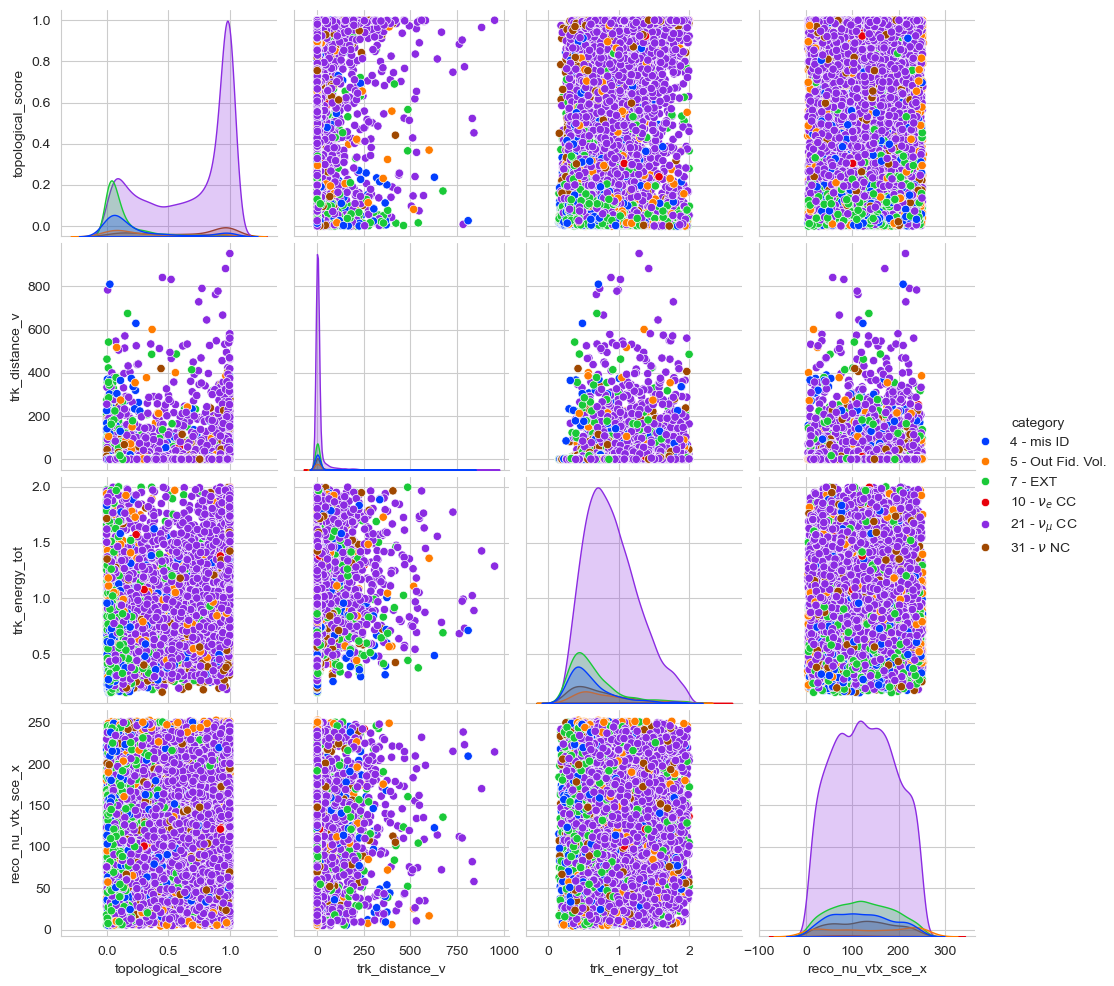

In [95]:
# Visualising a couple of variables.
variable_list = ['category', 'topological_score', 'trk_distance_v', 'trk_energy_tot', 'reco_nu_vtx_sce_x']

# List of categories in text
ptype = [r"mis ID", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu_{\mu}$ CC", r"$\nu$ NC"]

# Plot data
fig = sns.pairplot(MC_EXT_VIS[variable_list], hue = 'category', palette = 'bright')

# Change location of legend
fig._legend.set_bbox_to_anchor((1.05, 0.5))

# Add Category number and type to legend
for t, l in zip(fig._legend.texts, ptype):
   t.set_text(str(t.get_text()) + " - " + str(l))

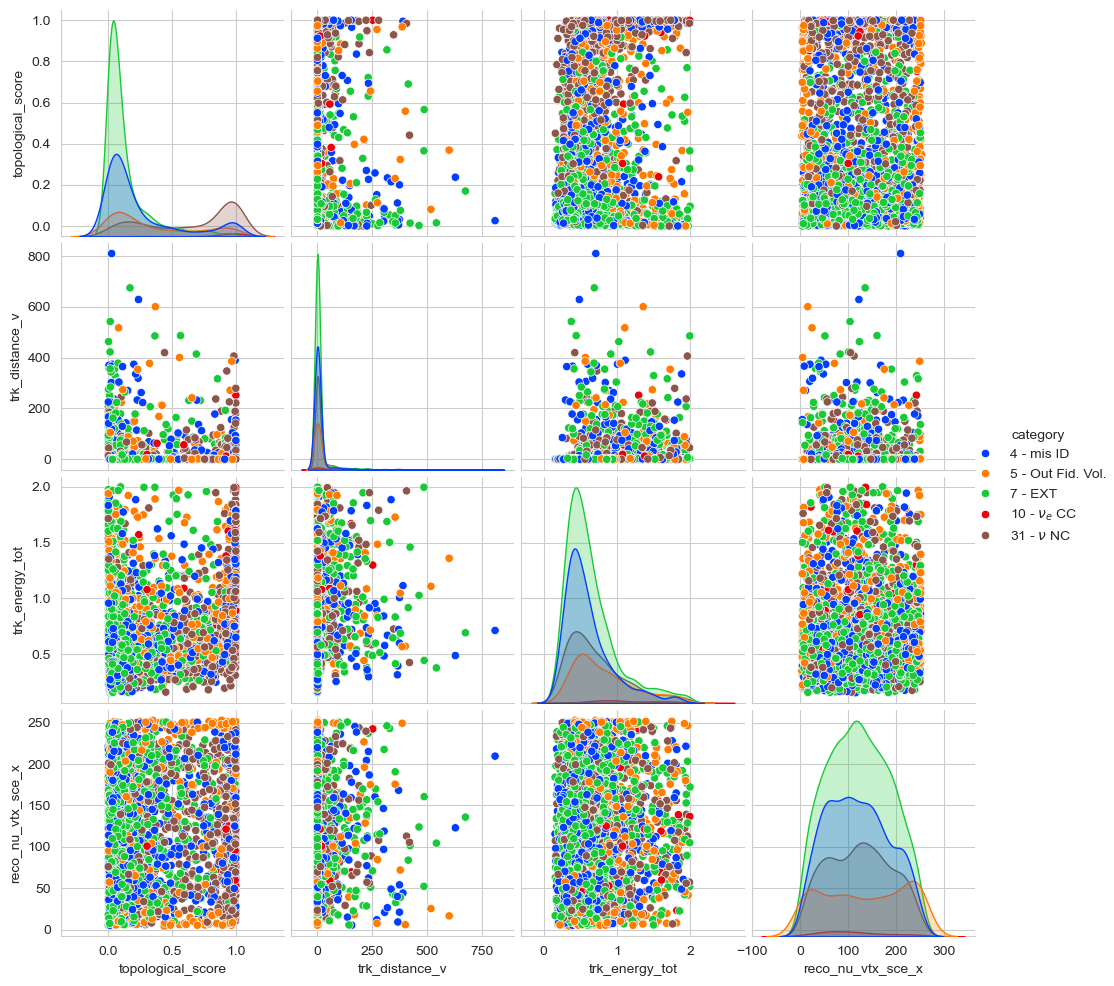

In [96]:
# Create a deep copy of MC_EXT_VIS without signal events
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

MC_EXT_BG = MC_EXT_VIS.copy(deep=True)
MC_EXT_BG = MC_EXT_BG[MC_EXT_BG['category'] != 21]

variable_list = ['category', 'topological_score', 'trk_distance_v',
                 'trk_energy_tot', 'reco_nu_vtx_sce_x']

# ❶ 图例文本：与当前5类一一对应，最后一个改为 ν NC
ptype = [r"mis ID", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu$ NC"]

# ❷ 只把 category==31 设为棕色，其它颜色保持 'bright'
#    先按出现顺序/排序得到类别列表
hue_order = sorted(MC_EXT_BG['category'].unique())
base_colors = sns.color_palette('bright', n_colors=len(hue_order))
# 构造映射：默认 bright 颜色，然后把 31 改成棕色
palette_map = {c: col for c, col in zip(hue_order, base_colors)}
palette_map[31] = '#8c564b'  # 棕色（与常见图例一致）

# 绘图
fig = sns.pairplot(MC_EXT_BG[variable_list], hue='category',
                   hue_order=hue_order, palette=palette_map, diag_kind='kde')

fig._legend.set_bbox_to_anchor((1.05, 0.5))

# 图例文字（长度与图例项一致）
for t, l in zip(fig._legend.texts, ptype):
    t.set_text(str(t.get_text()) + " - " + str(l))

plt.show()



In [97]:
# Plot your background events using sns.pairplot

# List of categories (excluding signal) in text
ptype_no_mu = [r"mid ID", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu$ NC"]


In [98]:
# Make sure to delete dataframe copies if you no longer need them!
##del MC_EXT_VIS

# Exercise 6: Random Forest applications

Here we shall modify the shape of our data for its usage in a decision tree, then apply the *RandomForest* method from the skikit-learn package.

In [99]:
# Adjust data shape
features = ['_closestNuCosmicDist', 'trk_len_v', 'trk_distance_v', 'topological_score', 'trk_sce_end_z_v', 'trk_sce_end_y_v', 'trk_sce_end_x_v', 'trk_score_v', 'trk_llr_pid_score_v', 'trk_sce_start_z_v', 'trk_sce_start_y_v', 'trk_sce_start_x_v', 'reco_nu_vtx_sce_x', 'reco_nu_vtx_sce_y', 'reco_nu_vtx_sce_z', 'trk_energy_tot']
output = ['category']

# Setup new database, NEED MORE VALUES
MC_EXT_ML = MC_EXT.copy(deep = True)
MC_EXT_ML = MC_EXT.sample(int(len(MC_EXT)/10))


# Remove muon neutrino and electron neutrino events.
MC_EXT_ML = MC_EXT_ML[~MC_EXT_ML['category'].isin([10, 21])]
# We did this to remove the dominant signal events and focus on background classification.

# Print length of dataframe,, with length N
print("Length of MC dataframe: ", len(MC_EXT_ML))

Length of MC dataframe:  31992


In [100]:
# Setting up input parameters for Random Forest
X = MC_EXT_ML[features]
y = np.array(MC_EXT_ML['category'])  # 也可以写成 y = MC_EXT_ML['category'].to_numpy()

# Display shape of X and y
print("(X) shape:", X.shape)
print("(y) shape:", y.shape)

# Split the data into training and testing sets (80/20)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# Print shapes of the training and test sets
print("\n(x_train) shape:", x_train.shape)
print("(y_train) shape:", y_train.shape)
print("(x_test) shape:", x_test.shape)
print("(y_test) shape:", y_test.shape)


(X) shape: (31992, 16)
(y) shape: (31992,)

(x_train) shape: (25593, 16)
(y_train) shape: (25593,)
(x_test) shape: (6399, 16)
(y_test) shape: (6399,)


Produce your randomforest model and fit it (dont worry, there is no explicit output, but make sure you haven't made your model too big! It shouldn't take any more than a couple of minutes at most to fit).

In [101]:
# Produce randomforest classifier model and fit to training data
# Keep the random_state=1 in your arguments
##rf = RandomForestClassifier(random_state=1)

# Fitting takes the input and "truth" data for classification purposes
## rf.fit(x_train, y_train)
# Produce randomforest classifier model and fit to training data
# Keep the random_state=1 in your arguments
# Using parameters to try and prevent overfitting suggested by the lab script.
rf = RandomForestClassifier(
    random_state=1,     # Keep random state for reproducibility.
    n_estimators=1000,  # Number of trees.
    max_depth=8,        # Maximum depth of each tree.
    criterion="gini"    # Use gini impurity as splitting criterion.
)

# Fitting takes the input and "truth" data for classification purposes
rf.fit(x_train, y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Test the accuracies of your results:

In [102]:
# Produce predictions for the classification of your training dataset using your model:
##y_pred = rf.predict(x_train)

# plot the accuracies of said predictions
##print("Accuracy on training dataset:",metrics.accuracy_score(y_train, y_pred))
##rf_acc_train = metrics.accuracy_score(y_train, y_pred)
##y_pred = rf.predict(x_test)
##print("Accuracy on testing dataset:",metrics.accuracy_score(y_test, y_pred))
##rf_acc_test = metrics.accuracy_score(y_test, y_pred)

# Produce predictions for the classification of your training dataset using your model:
y_train_pred = rf.predict(x_train)

# plot the accuracies of said predictions
print("Accuracy on training dataset:",metrics.accuracy_score(y_train, y_train_pred))
rf_acc_train = metrics.accuracy_score(y_train, y_train_pred)
# Now do the same for the testing dataset.
y_pred = y_test_pred = rf.predict(x_test)
print("Accuracy on testing dataset:",metrics.accuracy_score(y_test, y_test_pred))
rf_acc_test = metrics.accuracy_score(y_test, y_test_pred)

Accuracy on training dataset: 0.6660414957214863
Accuracy on testing dataset: 0.647444913267698


If your training accuracy is similar to your testing accuracy, this demonstrates that you haven't overfit your data!

#### Confusion matrix and variable importance

Produce a confusion matrix for your model to quantify its ability to predict your different interaction types.

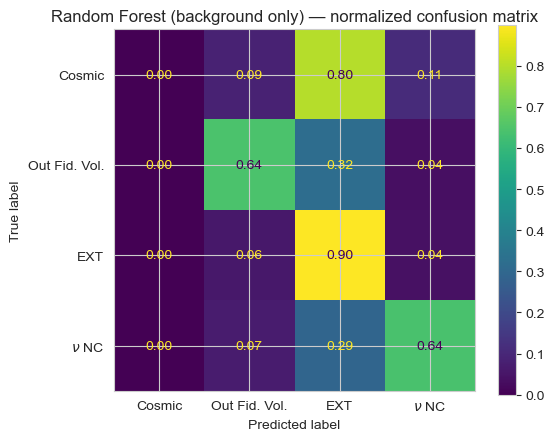

In [103]:
# For labelling your confusion matrix
##ptype_no_mu_e = [r"Cosmic", r"Out Fid. Vol.", r"EXT", r"$\nu$ NC"]

# plot your confusion matrix
##cm = confusion_matrix( ,normalize = 'true')
##disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ptype_no_mu_e)
##disp.plot()
##plt.show()
labels = [4, 5, 7, 31]
ptype_no_mu_e = [r"Cosmic", r"Out Fid. Vol.", r"EXT", r"$\nu$ NC"]

cm = confusion_matrix(y_test, y_test_pred, labels=labels, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ptype_no_mu_e)

fig, ax = plt.subplots(figsize=(5.8,4.6))
disp.plot(ax=ax, cmap='viridis', values_format='.02f', colorbar=True)
ax.set_title("Random Forest (background only) — normalized confusion matrix")
plt.tight_layout()
plt.show()

In [104]:
# Print counts of each category.
print("Counts of each category:")
print(MC_EXT_ML['category'].value_counts())

Counts of each category:
category
7     13595
5      9520
4      5069
31     3808
Name: count, dtype: int64


Plot the importance of your different parameters.

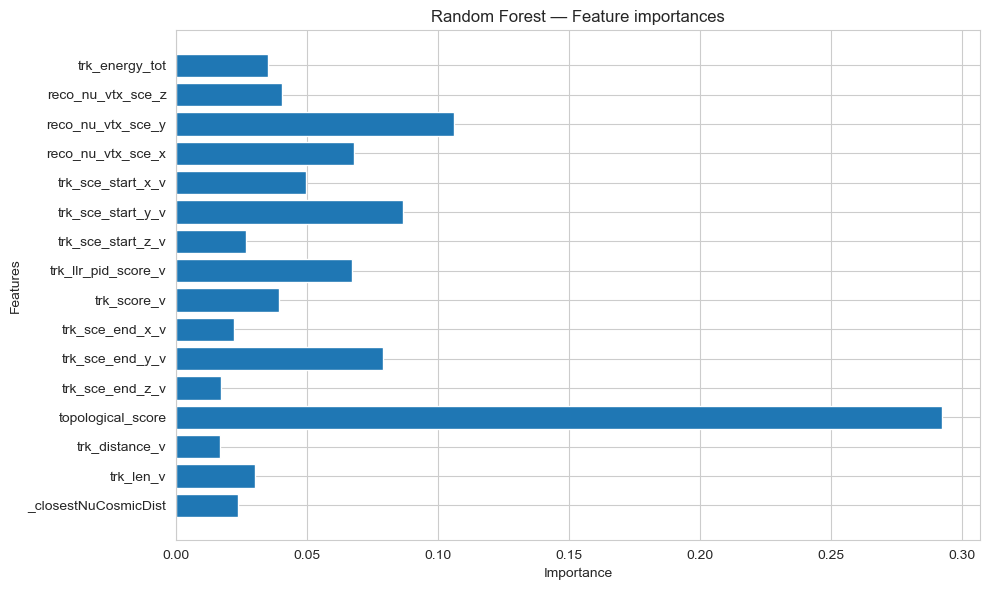

In [105]:
# Plot importance
##importance = rf.feature_importances_
##ytix = features

##plt.barh(range(16), importance)
##plt.yticks(range(16), features)
##plt.xlabel("Importance")
##plt.ylabel("Features")
##plt.show()
importance = rf.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(range(len(features)), importance)
plt.yticks(range(len(features)), features)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Random Forest — Feature importances")
plt.tight_layout()
plt.show()

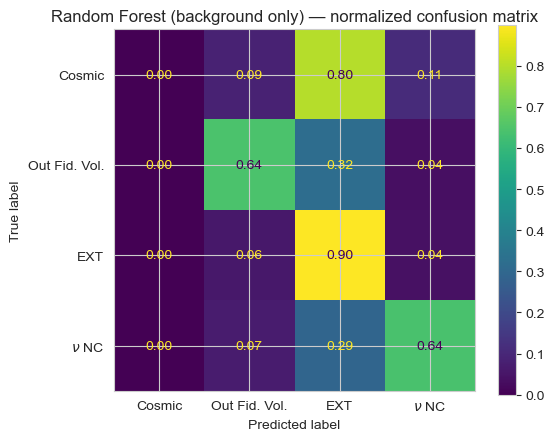

In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 定义标签顺序
labels = [4, 5, 7, 31]
ptype_no_mu_e = [r"Cosmic", r"Out Fid. Vol.", r"EXT", r"$\nu$ NC"]

# 生成混淆矩阵（标准化到每行和为1）
cm = confusion_matrix(y_test, y_test_pred, labels=labels, normalize='true')

# 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ptype_no_mu_e)
fig, ax = plt.subplots(figsize=(5.8, 4.6))
disp.plot(ax=ax, cmap='viridis', values_format='.02f', colorbar=True)
ax.set_title("Random Forest (background only) — normalized confusion matrix")
plt.tight_layout()
plt.show()

# Neutrino_functions.py

You are given access to a couple of template functions provided within Neutrino_functions.py, which may be helpful in completing this lab. One such function is 'Neutrino_functions.histogram_plot', which can be seen below, but you can create your own functions if you wish.

In [107]:
#This command shows what input you should give the plotting function. The inputs with =None can be left out when calling the function
help(Neutrino_functions.histogram_plot)

Help on function histogram_plot in module Neutrino_functions:

histogram_plot(
    MC_frame,
    variable,
    bins,
    name,
    scaling,
    xlims=[],
    plot_fig=True,
    plot_data=False,
    logscale=None,
    dataFrame=None,
    Stat_func=None
)
    MC_frame: pandas dataframe - MC dataframe
    variable: string - name of the variable
    bins: int - number of bins
    name: string - name of the plot. The plot is saved
    scaling: array/list - weights you want to apply on MC data
    plot_data: boolean - if True then plots data as well
    logscale: boolean - if True then y axis is log scale
    dataFrame: pandas dataframe - data dataframe



# Exercise 7: Selection Cuts and Histogram plotting

Modify selection cuts. Remember to cut the same variables in both data sets.

In [108]:
def Selections(frame):
    
    # Basic variables present in dataframe 
    trk_start_x_v = frame['trk_sce_start_x_v']        # cm
    trk_start_y_v = frame['trk_sce_start_y_v']        # cm
    trk_start_z_v = frame['trk_sce_start_z_v']        # cm
    trk_end_x_v = frame['trk_sce_end_x_v']            # cm
    trk_end_y_v = frame['trk_sce_end_y_v']            # cm
    trk_end_z_v = frame['trk_sce_end_z_v']            # cm
    reco_x = frame['reco_nu_vtx_sce_x']               # cm
    reco_y = frame['reco_nu_vtx_sce_y']               # cm
    reco_z = frame['reco_nu_vtx_sce_z']               # cm
    topological = frame['topological_score']          # N/A
    trk_score_v = frame['trk_score_v']                # N/A
    trk_dis_v = frame['trk_distance_v']               # cm
    trk_len_v = frame['trk_len_v']                    # cm
    trk_energy_tot = frame['trk_energy_tot']          # GeV 
    
    
    
    # select the conditions you want to apply, here is an initial condition to get you started.
    selection =  ((trk_len_v > -1000) & (trk_len_v < 1000))
    
    # Apply selection on dataframe
    frame = frame[selection]
    
    return frame

## Calls the selection function on the dataframes

In [109]:
MC_EXT = Selections(MC_EXT)
data_frame = Selections(data)

# Plot all variables and decide on selection cuts
Here is the section with the example histogram plots for each variable. Create a new cell and implement your own function to plot all the histograms.

In [110]:
# Common variables in both dataframes
all_variables_to_plot = list(set(list(MC_EXT)).intersection(list(data_frame)))
print(all_variables_to_plot)


['trk_llr_pid_score_v', 'reco_nu_vtx_sce_y', 'trk_sce_start_x_v', 'trk_score_v', 'trk_distance_v', 'topological_score', 'trk_energy_tot', 'trk_len_v', 'reco_nu_vtx_sce_x', '_closestNuCosmicDist', 'reco_nu_vtx_sce_z', 'category', 'trk_sce_end_x_v', 'trk_sce_start_z_v', 'trk_sce_end_z_v', 'trk_range_muon_mom_v', 'trk_sce_start_y_v', 'trk_mcs_muon_mom_v', 'trk_sce_end_y_v']


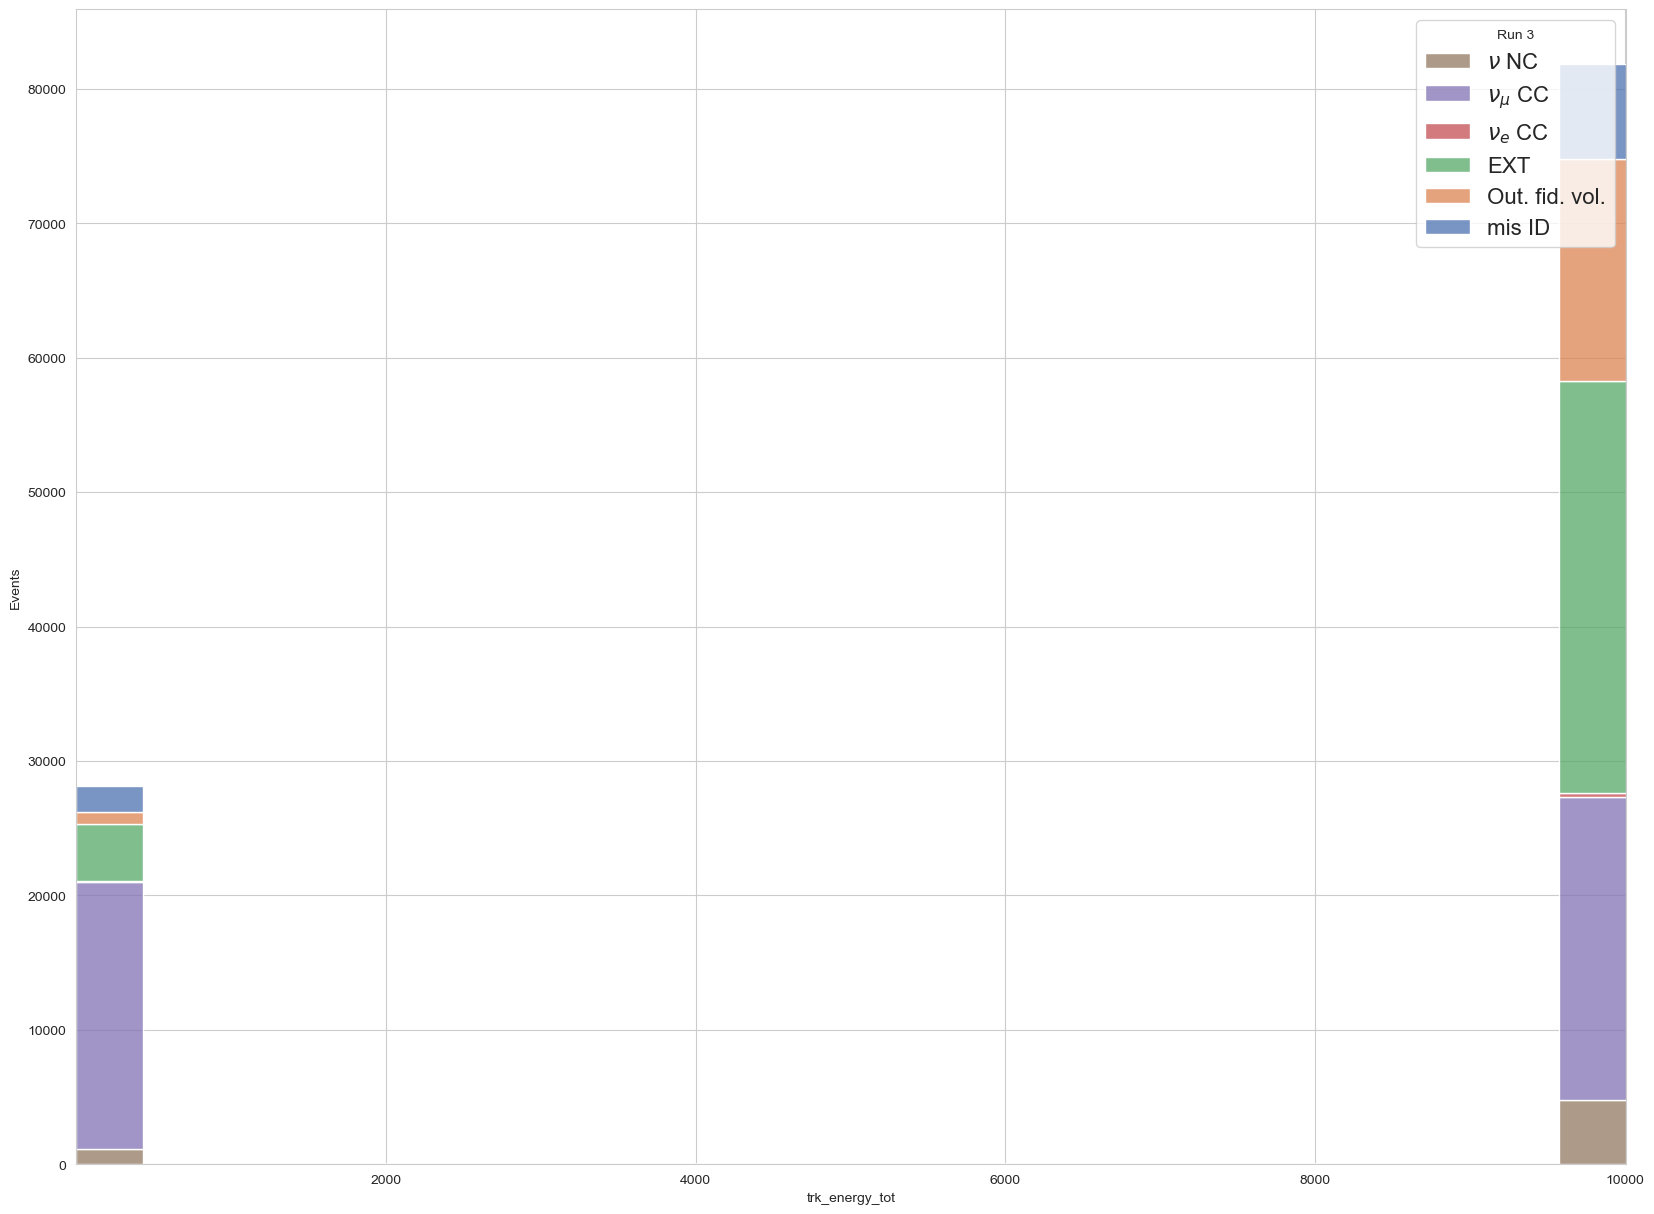

In [111]:
# Simple histogram plot of one variable.
BIN = 23
plt.figure(figsize=(20,15))
i = sns.histplot(data=MC_EXT, x='trk_energy_tot', multiple="stack", hue="category", palette = 'deep', weights = MC_EXT['weight'], bins = BIN, legend = False)
i.set(xlabel='trk_energy_tot', ylabel = "Events")

#plt.yscale('log')
plt.xlim([np.min(MC_EXT['trk_energy_tot']), np.max(MC_EXT['trk_energy_tot'])])
plt.legend(title='Run 3',fontsize=16, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"mis ID"])
plt.show(i)

In [112]:
def plot_all_histograms(df, variables, title_cut, BIN=23, figsize=(20, 30)):
    """Plot stacked, weighted histograms for the variables in a 2-col grid."""
    n_vars = len(variables)
    n_cols = 2
    n_rows = (n_vars + n_cols - 1) // n_cols

    plt.figure(figsize=figsize)
    for idx, var in enumerate(variables):
        ax = plt.subplot(n_rows, n_cols, idx + 1)
        i = sns.histplot(
            data=df, x=var,
            multiple="stack", hue="category",
            palette='deep', weights=MC_EXT['weight'],
            bins=BIN, legend=False)
        i.set(xlabel=var, ylabel="Events")
        # plt.yscale('log')  # enable if you want to inspect long tails
        plt.xlim([np.min(MC_EXT[var]), np.max(MC_EXT[var])])

    # put legend into an extra empty slot
    legend_ax = plt.subplot(n_rows, n_cols, n_rows * n_cols)
    legend_ax.axis('off')
    labels = [r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC",
              r"EXT", r"Out. fid. vol.", r"mis ID"]
    patches = [plt.Rectangle((0,0),1,1) for _ in labels]
    legend_ax.legend(patches, labels, title='Categories',
                     loc='center', fontsize=14, title_fontsize=16)

    plt.tight_layout()
    plt.show(i)


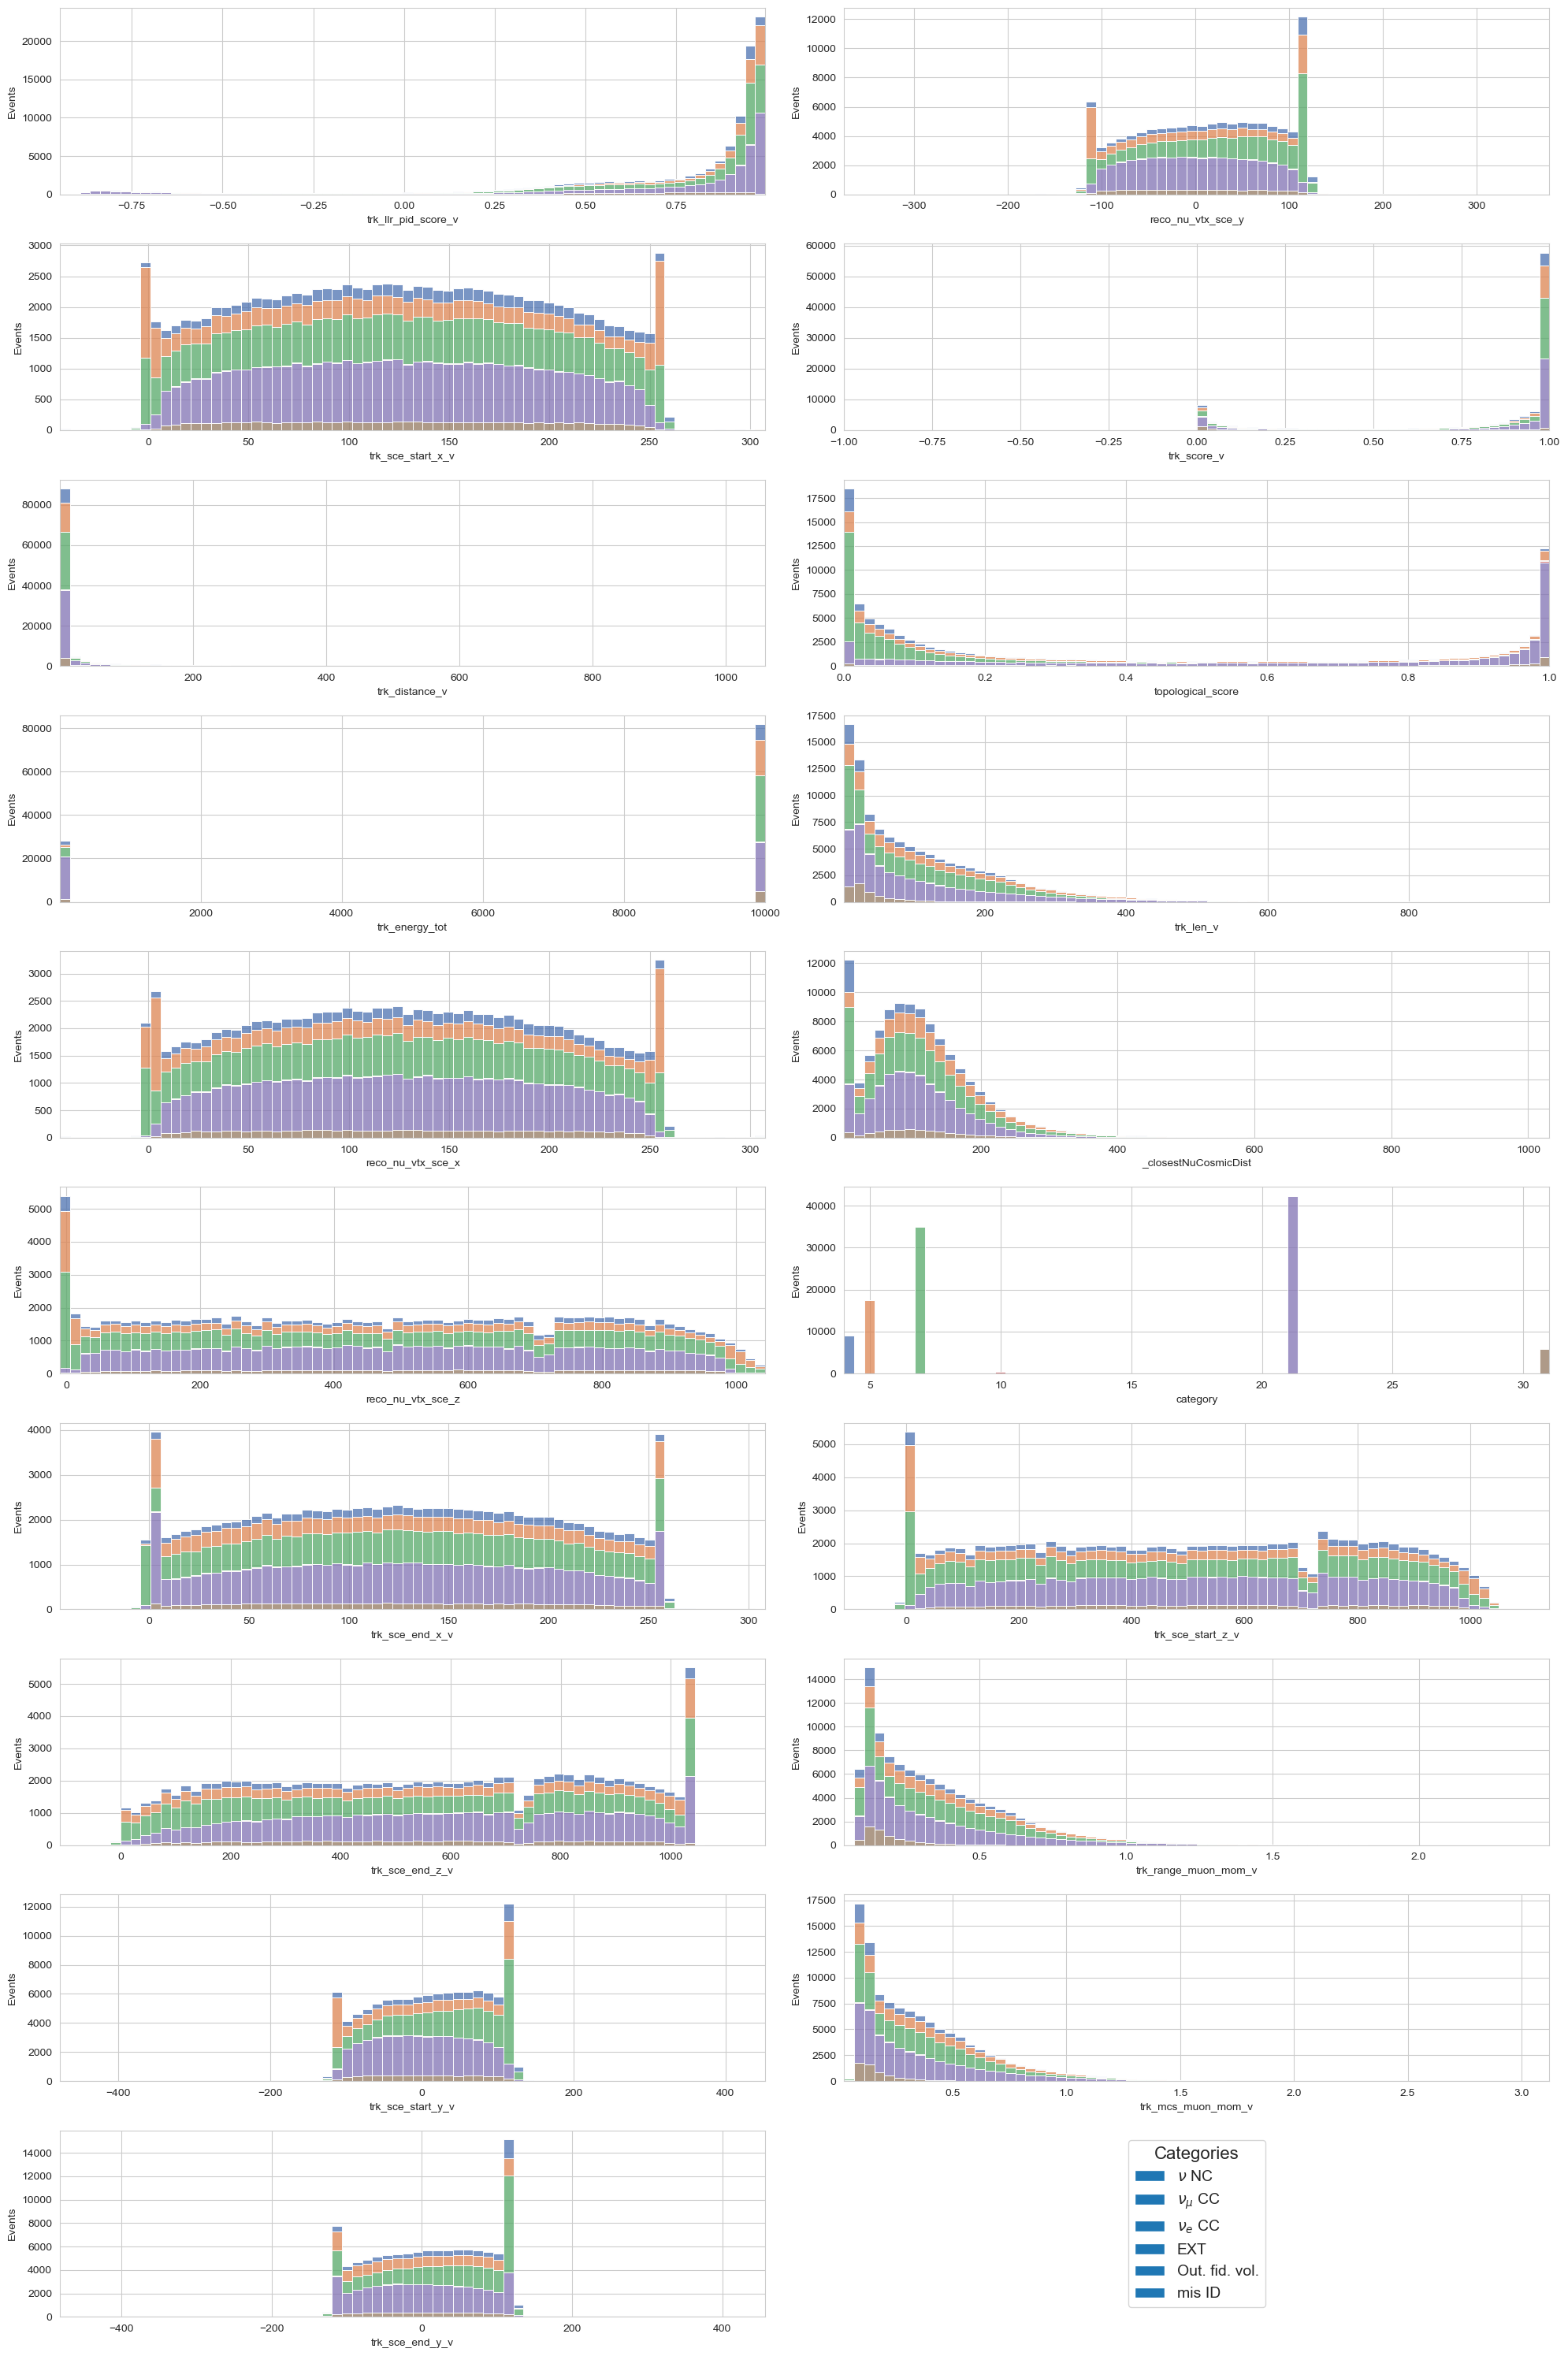

In [113]:
sns.set_style("whitegrid")

plot_all_histograms(MC_EXT, all_variables_to_plot, "", BIN = 70)

# Exercise 8: Check the purity and efficiency of the sample
It is recommended to plot purity and efficiency after each variable cut.

**HINT:** Function Selection() has commented lines of code that you may find useful for purpose of plotting changes in purity/efficiency after every cut.

In [114]:
import numpy as np
import pandas as pd

def apply_selections(df, cuts):
    mask = np.ones(len(df), dtype=bool)
    for col, (mode, val) in cuts.items():
        s = pd.to_numeric(df[col], errors='coerce')
        if mode == '<':    mask &= (s <  val)
        elif mode == '<=': mask &= (s <= val)
        elif mode == '>':  mask &= (s >  val)
        elif mode == '>=': mask &= (s >= val)
        elif mode == 'between':
            lo, hi = val;  mask &= (s >= lo) & (s <= hi)
        elif mode == 'outside':
            lo, hi = val;  mask &= (s < lo) | (s >  hi)
        else:
            raise ValueError(f"Unknown mode {mode}")
    return df[mask].copy(), mask

def stepwise_metrics(df, signal_col='category', signal_code=21, steps=None):
    """
    steps: list of tuples (name, {col: (mode, value), ...}) 
           每一步可以是一个或多个 cut 的组合
    """
    N0 = len(df)
    S0 = (df[signal_col] == signal_code).sum()

    running = df.copy()
    print(f"BASELINE: total={N0}, signal={S0}, purity={S0/N0:.3f}")

    for i, (label, cut_dict) in enumerate(steps, 1):
        running, _ = apply_selections(running, cut_dict)
        Nt = len(running)
        St = (running[signal_col] == signal_code).sum()
        eff_overall = Nt/N0
        eff_signal  = St/S0 if S0>0 else np.nan
        purity      = St/Nt if Nt>0 else np.nan
        print(f"[{i}] {label:12s}  total={Nt:6d}  signal={St:6d}  "
              f"eff_total={eff_overall:.3f}  eff_sig={eff_signal:.3f}  purity={purity:.3f}")
    return running

# === 按你的顺序定义每一步（示例，数值用你当前的）===
steps = [
    ("E<2GeV",               {'trk_energy_tot': ('<', 2.0)}),
    ("Fid x [15,285]",       {'reco_nu_vtx_sce_x': ('between', (15, 285))}),
    ("Fid y [-100,100]",     {'reco_nu_vtx_sce_y': ('between', (-100, 100))}),
    ("Fid z [50,980]",       {'reco_nu_vtx_sce_z': ('between', (50, 980))}),
]

_ = stepwise_metrics(MC_EXT, signal_col='category', signal_code=21, steps=steps)


BASELINE: total=555442, signal=234121, purity=0.422
[1] E<2GeV        total=144210  signal=105086  eff_total=0.260  eff_sig=0.449  purity=0.729
[2] Fid x [15,285]  total=139838  signal=102176  eff_total=0.252  eff_sig=0.436  purity=0.731
[3] Fid y [-100,100]  total=127771  signal= 96110  eff_total=0.230  eff_sig=0.411  purity=0.752
[4] Fid z [50,980]  total=124083  signal= 93348  eff_total=0.223  eff_sig=0.399  purity=0.752


In [115]:
# New selection function for new selection.
def Selections_trk_energy_tot(frame):
    """
    Apply selection cut on dataframe based on track energy total. Cutting all above 1 GeV.

    Calculates and prints efficiency and purity of the cut.
    """
    
    # Total number of events before cut. 
    num_events_initial = len(frame)

    # Basic variables present in dataframe 
    trk_start_x_v = frame['trk_sce_start_x_v']        # cm
    trk_start_y_v = frame['trk_sce_start_y_v']        # cm
    trk_start_z_v = frame['trk_sce_start_z_v']        # cm
    trk_end_x_v = frame['trk_sce_end_x_v']            # cm
    trk_end_y_v = frame['trk_sce_end_y_v']            # cm
    trk_end_z_v = frame['trk_sce_end_z_v']            # cm
    reco_x = frame['reco_nu_vtx_sce_x']               # cm
    reco_y = frame['reco_nu_vtx_sce_y']               # cm
    reco_z = frame['reco_nu_vtx_sce_z']               # cm
    topological = frame['topological_score']          # N/A
    trk_score_v = frame['trk_score_v']                # N/A
    trk_dis_v = frame['trk_distance_v']               # cm
    trk_len_v = frame['trk_len_v']                    # cm
    trk_energy_tot = frame['trk_energy_tot']          # GeV 
    
    
    
    # select the conditions you want to apply, here is an initial condition to get you started.
    selection =  ((trk_len_v > -1000) & (trk_len_v < 1000))
    selection = selection & (trk_energy_tot < 1)
    
    # Apply selection on dataframe
    frame = frame[selection]

    # Total number of events after cut.
    num_events_final = len(frame)

    # Efficiency calculation.
    efficiency = num_events_final / num_events_initial

    # Number of signal events after cut.
    num_signal_final = len(frame[frame["category"] == 21])

    # Purity calculation.
    purity = num_signal_final / num_events_final

    print(f"Efficiency of cut: {efficiency:.4f}")
    print(f"Purity of cut: {purity:.4f}")

    return frame

In [116]:
# Making the cut in the trk_energy_tot.
MC_EXT_cut_trk_energy_tot = Selections_trk_energy_tot(MC_EXT)
data_frame_cut_trk_energy_tot = Selections_trk_energy_tot(data_frame)

Efficiency of cut: 0.1808
Purity of cut: 0.6709
Efficiency of cut: 0.1787
Purity of cut: 0.0000


[MC]   trk_llr_pid_score_v > 0.25  efficiency=0.891  purity=0.408  kept=494769/555442
[DATA] trk_llr_pid_score_v > 0.25  efficiency=0.901  purity=N/A      kept=108069/119911


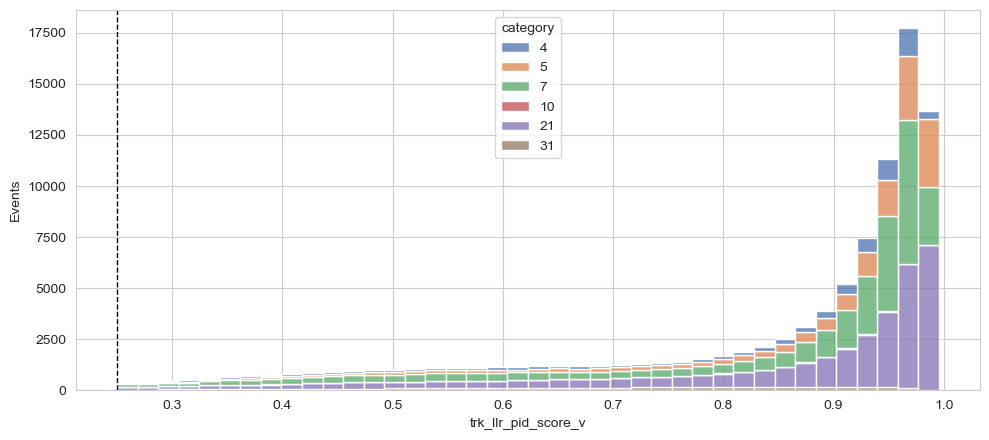

In [117]:
def one_sided_cut_metrics(df, var, thr, side='>'):
    mask = (df[var] > thr) if side == '>' else (df[var] < thr)
    n_before = len(df)
    n_after  = int(mask.sum())
    eff = n_after / n_before if n_before else 0.0
    if 'category' in df.columns and n_after > 0:  # MC
        purity = (df.loc[mask, 'category'] == 21).mean()
    else:
        purity = float('nan')  # data 没有真标签
    return df[mask].copy(), eff, purity

thr = 0.25
MC_cut_pid, eff_mc, pur_mc = one_sided_cut_metrics(MC_EXT, 'trk_llr_pid_score_v', thr, side='>')
DATA_cut_pid, eff_dt, _    = one_sided_cut_metrics(data_frame, 'trk_llr_pid_score_v', thr, side='>')

print(f"[MC]   trk_llr_pid_score_v > {thr:.2f}  efficiency={eff_mc:.3f}  purity={pur_mc:.3f}  "
      f"kept={len(MC_cut_pid)}/{len(MC_EXT)}")
print(f"[DATA] trk_llr_pid_score_v > {thr:.2f}  efficiency={eff_dt:.3f}  purity=N/A      "
      f"kept={len(DATA_cut_pid)}/{len(data_frame)}")
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4.5))
ax = sns.histplot(
    data=MC_cut_pid, x='trk_llr_pid_score_v',
    multiple='stack', hue='category', palette='deep',
    bins=40, legend=True,
    weights=MC_cut_pid['weight'] if 'weight' in MC_cut_pid.columns else None
)
ax.set_xlabel('trk_llr_pid_score_v'); ax.set_ylabel('Events')
ax.axvline(thr, linestyle='--', color='k', linewidth=1)  # 阈值虚线
plt.tight_layout(); plt.show()



Individual cut: topological_score in [0.5, 1.0]
[MC]   topological_score in [0.5, 1.0]  efficiency=0.6586  purity=0.6961  kept=221507/555442
[DATA] topological_score in [0.5, 1.0]  efficiency=0.0000  purity=N/A      kept=41991/119911


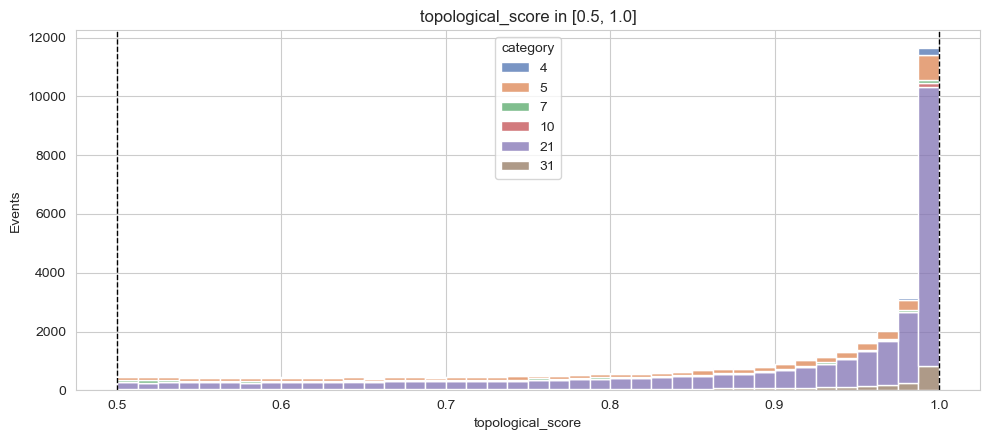


Individual cut: trk_sce_start_z_v  (cm) in [20, 980]
[MC]   trk_sce_start_z_v in [20, 980]  efficiency=0.9852  purity=0.4514  kept=510947/555442
[DATA] trk_sce_start_z_v in [20, 980]  efficiency=0.0000  purity=N/A      kept=108198/119911


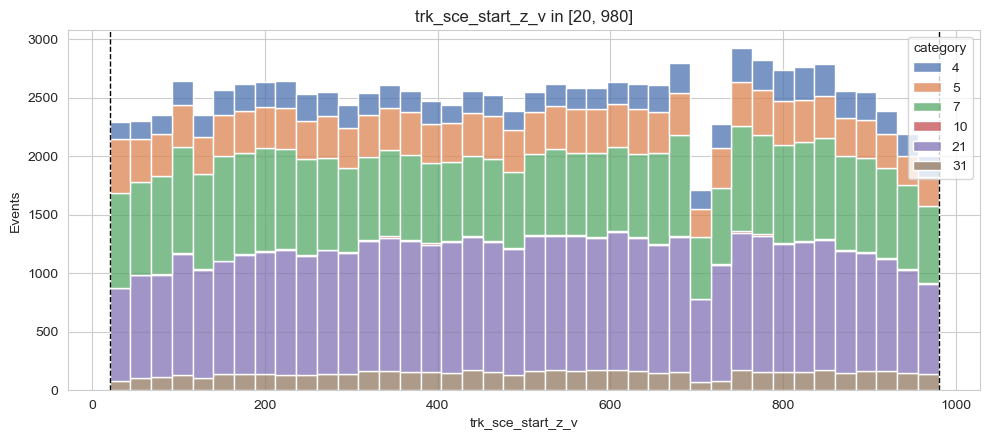


Individual cut: trk_sce_start_x_v  (cm) in [20, 240]
[MC]   trk_sce_start_x_v in [20, 240]  efficiency=0.9197  purity=0.4541  kept=474140/555442
[DATA] trk_sce_start_x_v in [20, 240]  efficiency=0.0000  purity=N/A      kept=102253/119911


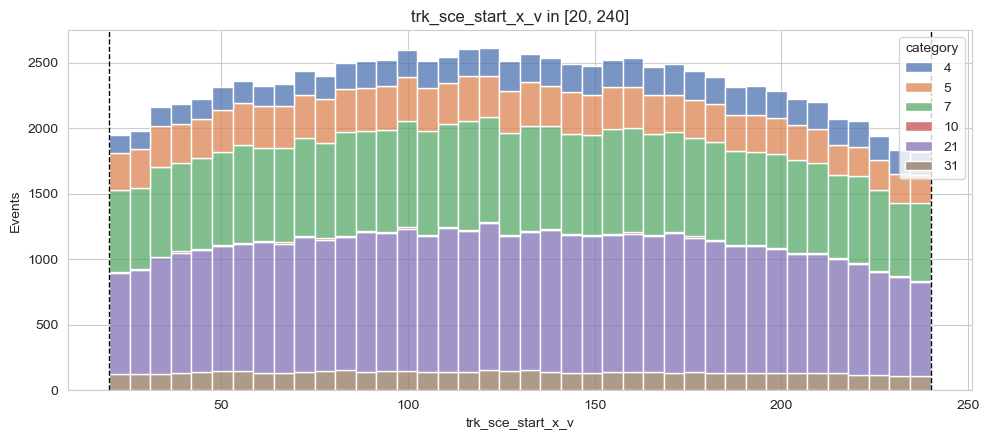


Individual cut: trk_sce_start_y_v  (cm) in [-105, 110]
[MC]   trk_sce_start_y_v in [-105, 110]  efficiency=0.9612  purity=0.4802  kept=468574/555442
[DATA] trk_sce_start_y_v in [-105, 110]  efficiency=0.0000  purity=N/A      kept=99195/119911


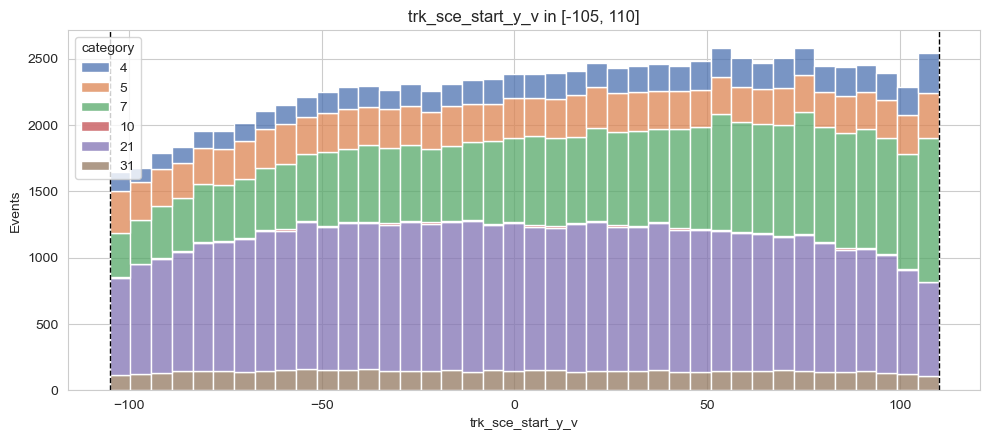


Individual cut: reco_nu_vtx_sce_z (cm) in [20, 980]
[MC]   reco_nu_vtx_sce_z in [20, 980]  efficiency=0.9888  purity=0.4549  kept=508898/555442
[DATA] reco_nu_vtx_sce_z in [20, 980]  efficiency=0.0000  purity=N/A      kept=107530/119911


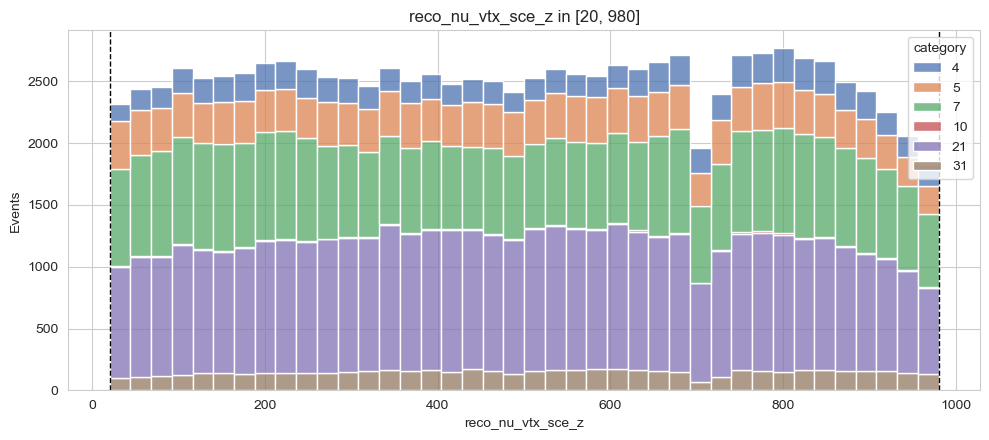


Individual cut: reco_nu_vtx_sce_y (cm) in [-110, 110]
[MC]   reco_nu_vtx_sce_y in [-110, 110]  efficiency=0.9748  purity=0.4886  kept=467140/555442
[DATA] reco_nu_vtx_sce_y in [-110, 110]  efficiency=0.0000  purity=N/A      kept=98837/119911


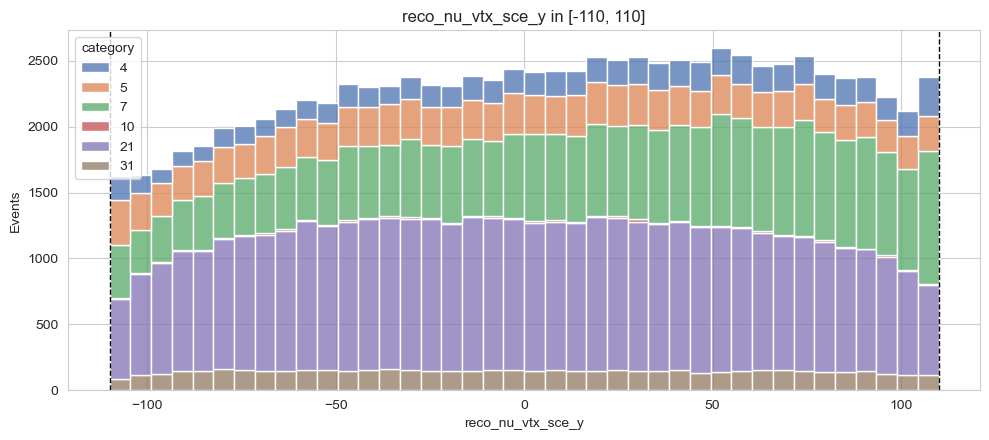


Individual cut: reco_nu_vtx_sce_x (cm) in [10, 250]
[MC]   reco_nu_vtx_sce_x in [10, 250]  efficiency=0.9782  purity=0.4540  kept=504428/555442
[DATA] reco_nu_vtx_sce_x in [10, 250]  efficiency=0.0000  purity=N/A      kept=108744/119911


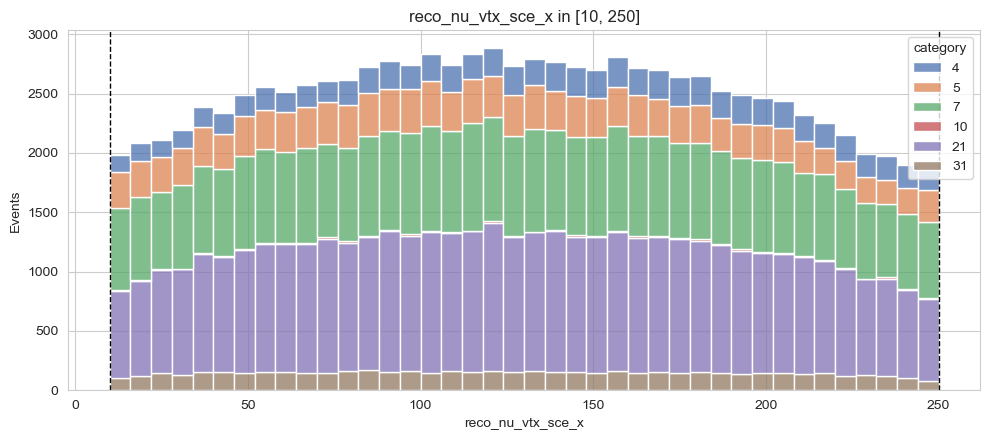


Individual cut: trk_energy_tot     (GeV) in [-inf, 2.5]
[MC]   trk_energy_tot in [-inf, 2.5]  efficiency=0.4619  purity=0.7310  kept=147942/555442
[DATA] trk_energy_tot in [-inf, 2.5]  efficiency=0.0000  purity=N/A      kept=29377/119911


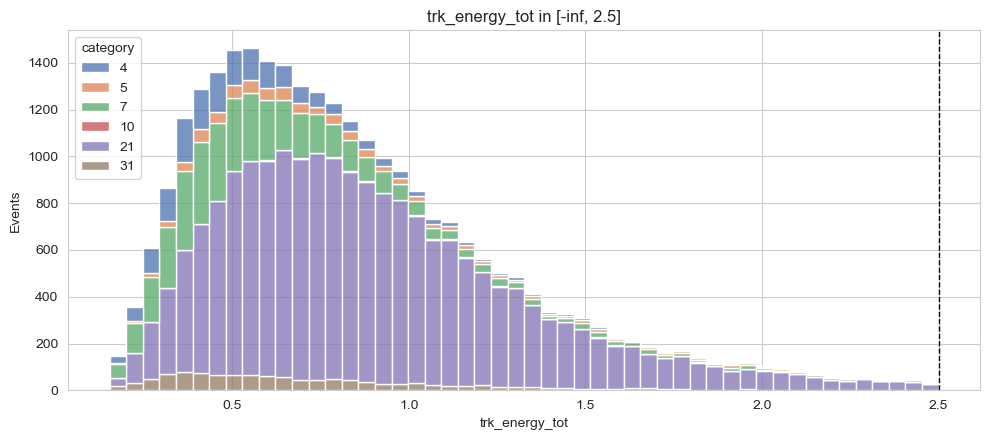

In [130]:

sns.set_style("whitegrid")

# --- 1) 小工具：确保拿到 DataFrame（防止传进来是 (df, eff, purity) 的元组）
def _ensure_df(df):
    if isinstance(df, (tuple, list)) and len(df) and hasattr(df[0], "columns"):
        return df[0]
    return df

# --- 2) Eq.(6) 信号效率 + 纯度；并在开头调用 _ensure_df
def interval_cut_metrics(df, var, lo=None, hi=None, signal_label=21):
    """返回：被选中的副本、efficiency(=信号效率, Eq.6)、purity（data 无标签则 NaN）"""
    import numpy as np
    df = _ensure_df(df)  # ← 防止 df 是元组
    if lo is None: lo = -np.inf
    if hi is None: hi =  np.inf

    mask = (df[var] >= lo) & (df[var] <= hi)

    eff = float('nan')   # 信号效率 Eq.(6)
    purity = float('nan')

    if 'category' in df.columns:
        is_sig = (df['category'] == signal_label)
        total_signal = int(is_sig.sum())
        surviving_signal = int((mask & is_sig).sum())
        eff = (surviving_signal / total_signal) if total_signal else 0.0

        n_after = int(mask.sum())
        if n_after:
            purity = surviving_signal / n_after

    return df[mask].copy(), eff, purity



# ---------- 画单张（与原风格一致） ----------
def plot_single_cut(MC_df, DATA_df, var, lo=None, hi=None, bins=40, palette='deep'):
    """对某变量的一个区间 cut，打印 MC/DATA 的效率、纯度（DATA 纯度 N/A），并画 MC 分解直方图"""
    MC_sel, eff_mc, pur_mc = interval_cut_metrics(MC_df, var, lo, hi, signal_label=21)
    DT_sel, eff_dt, pur_dt = interval_cut_metrics(DATA_df, var, lo, hi, signal_label=21)

    lo_str = "-inf" if (lo is None or np.isneginf(lo)) else f"{lo}"
    hi_str = "+inf" if (hi is None or np.isposinf(hi)) else f"{hi}"

    kept_mc  = len(MC_sel)
    kept_dt  = len(DT_sel)

    print(f"[MC]   {var} in [{lo_str}, {hi_str}]  efficiency={eff_mc:.4f}  purity={pur_mc:.4f}  kept={kept_mc}/{len(MC_df)}")
    print(f"[DATA] {var} in [{lo_str}, {hi_str}]  efficiency={eff_dt:.4f}  purity=N/A      kept={kept_dt}/{len(DATA_df)}")

    # 仅画 MC（按 category 分颜色，带权重）
    plt.figure(figsize=(10, 4.5))
    ax = sns.histplot(
        data=MC_sel, x=var,
        multiple="stack", hue="category",
        palette=palette, bins=bins, legend=True,
        weights=MC_sel['weight'] if 'weight' in MC_sel.columns else None
    )
    ax.set_xlabel(var); ax.set_ylabel("Events")
    # cut 边界虚线
    if lo is not None and not np.isneginf(lo):
        ax.axvline(lo, linestyle='--', color='k', linewidth=1)
    if hi is not None and not np.isposinf(hi):
        ax.axvline(hi, linestyle='--', color='k', linewidth=1)
    ax.set_title(f"{var} in [{lo_str}, {hi_str}]")
    plt.tight_layout()
    plt.show()

# ---------- 可选：变量→更易读标签（仅用于标题） ----------
pretty = {
    'topological_score': 'topological_score',
    'trk_sce_start_z_v': 'trk_sce_start_z_v  (cm)',
    'trk_sce_start_x_v': 'trk_sce_start_x_v  (cm)',
    'trk_sce_start_y_v': 'trk_sce_start_y_v  (cm)',
    'reco_nu_vtx_sce_z': 'reco_nu_vtx_sce_z (cm)',
    'reco_nu_vtx_sce_y': 'reco_nu_vtx_sce_y (cm)',
    'reco_nu_vtx_sce_x': 'reco_nu_vtx_sce_x (cm)',
    'trk_energy_tot':    'trk_energy_tot     (GeV)',
}

# ---------- 你的 cut 规格（逐个 individual 执行） ----------
cut_specs = [
    ('topological_score', 0.5, 1.0),      # 0.5 < S_topo < 1
    ('trk_sce_start_z_v', 20, 980),       # 20 < start_z < 980
    ('trk_sce_start_x_v', 20, 240),       # 20 < start_x < 240
    ('trk_sce_start_y_v', -105, 110),     # -105 < start_y < 110
    ('reco_nu_vtx_sce_z', 20, 980),       # 20 < vtx_z < 980
    ('reco_nu_vtx_sce_y', -110, 110),     # -110 < vtx_y < 110
    ('reco_nu_vtx_sce_x', 10, 250),       # 10 < vtx_x < 250
    ('trk_energy_tot', None, 2.5),        # trk_energy_tot < 2.5 GeV（单边）
]

# ---------- 逐个执行并绘图 ----------
for var, lo, hi in cut_specs:
    # 选择一个合适的 bin 数：位置变量用 40，score 用 40，能量用 50（可按需调）
    bins = 50 if var == 'trk_energy_tot' else 40
    print("\n" + "="*90)
    print(f"Individual cut: {pretty.get(var, var)} in [{'-inf' if lo is None else lo}, {'+inf' if hi is None else hi}]")
    plot_single_cut(MC_EXT, data_frame, var, lo, hi, bins=bins)



In [131]:
# —— 计算“联合 cut”的总 efficiency(信号效率, Eq.6) 和 purity —— 
def total_metrics_for_cuts(MC_df, DATA_df, cut_specs, signal_label=21):
    import numpy as np
    MC_df = _ensure_df(MC_df)
    DATA_df = _ensure_df(DATA_df)

    def build_mask(df):
        mask = np.ones(len(df), dtype=bool)
        for var, lo, hi in cut_specs:
            lo_v = -np.inf if lo is None else lo
            hi_v =  np.inf if hi is None else hi
            mask &= (df[var] >= lo_v) & (df[var] <= hi_v)
        return mask

    # ---- MC（有标签）
    mc_mask = build_mask(MC_df)
    kept_mc = int(mc_mask.sum())
    total_mc = len(MC_df)

    eff_mc = float('nan')
    pur_mc = float('nan')
    if 'category' in MC_df.columns:
        is_sig_mc = (MC_df['category'] == signal_label)
        total_sig_mc = int(is_sig_mc.sum())
        kept_sig_mc  = int((is_sig_mc & mc_mask).sum())
        eff_mc = kept_sig_mc / total_sig_mc if total_sig_mc > 0 else float('nan')     # Eq.(6)
        pur_mc = kept_sig_mc / kept_mc if kept_mc > 0 else float('nan')

    # ---- DATA（通常无标签：效率/纯度返回 NaN）
    dt_mask = build_mask(DATA_df)
    kept_dt = int(dt_mask.sum())
    total_dt = len(DATA_df)
    eff_dt = float('nan')   # 没有 signal 标签 → 未定义
    pur_dt = float('nan')

    print("\n" + "="*90)
    print("OVERALL (combined cuts in cut_specs)")
    def fmt(x): return "N/A" if (x != x) else f"{x:.4f}"
    print(f"[MC]   efficiency(Eq.6)={fmt(eff_mc)}  purity={fmt(pur_mc)}  kept={kept_mc}/{total_mc}")
    print(f"[DATA] efficiency(Eq.6)=N/A           purity=N/A          kept={kept_dt}/{total_dt}")

    # 若你还想得到筛后的 DataFrame，可一并返回
    return MC_df[mc_mask].copy(), DATA_df[dt_mask].copy(), eff_mc, pur_mc

# —— 直接调用（只对 cut_specs 里的 8 条 cut 生效）——
MC_after, DATA_after, eff_total, pur_total = total_metrics_for_cuts(MC_EXT, data_frame, cut_specs, signal_label=21)



OVERALL (combined cuts in cut_specs)
[MC]   efficiency(Eq.6)=0.2905  purity=0.8990  kept=75639/555442
[DATA] efficiency(Eq.6)=N/A           purity=N/A          kept=13668/119911


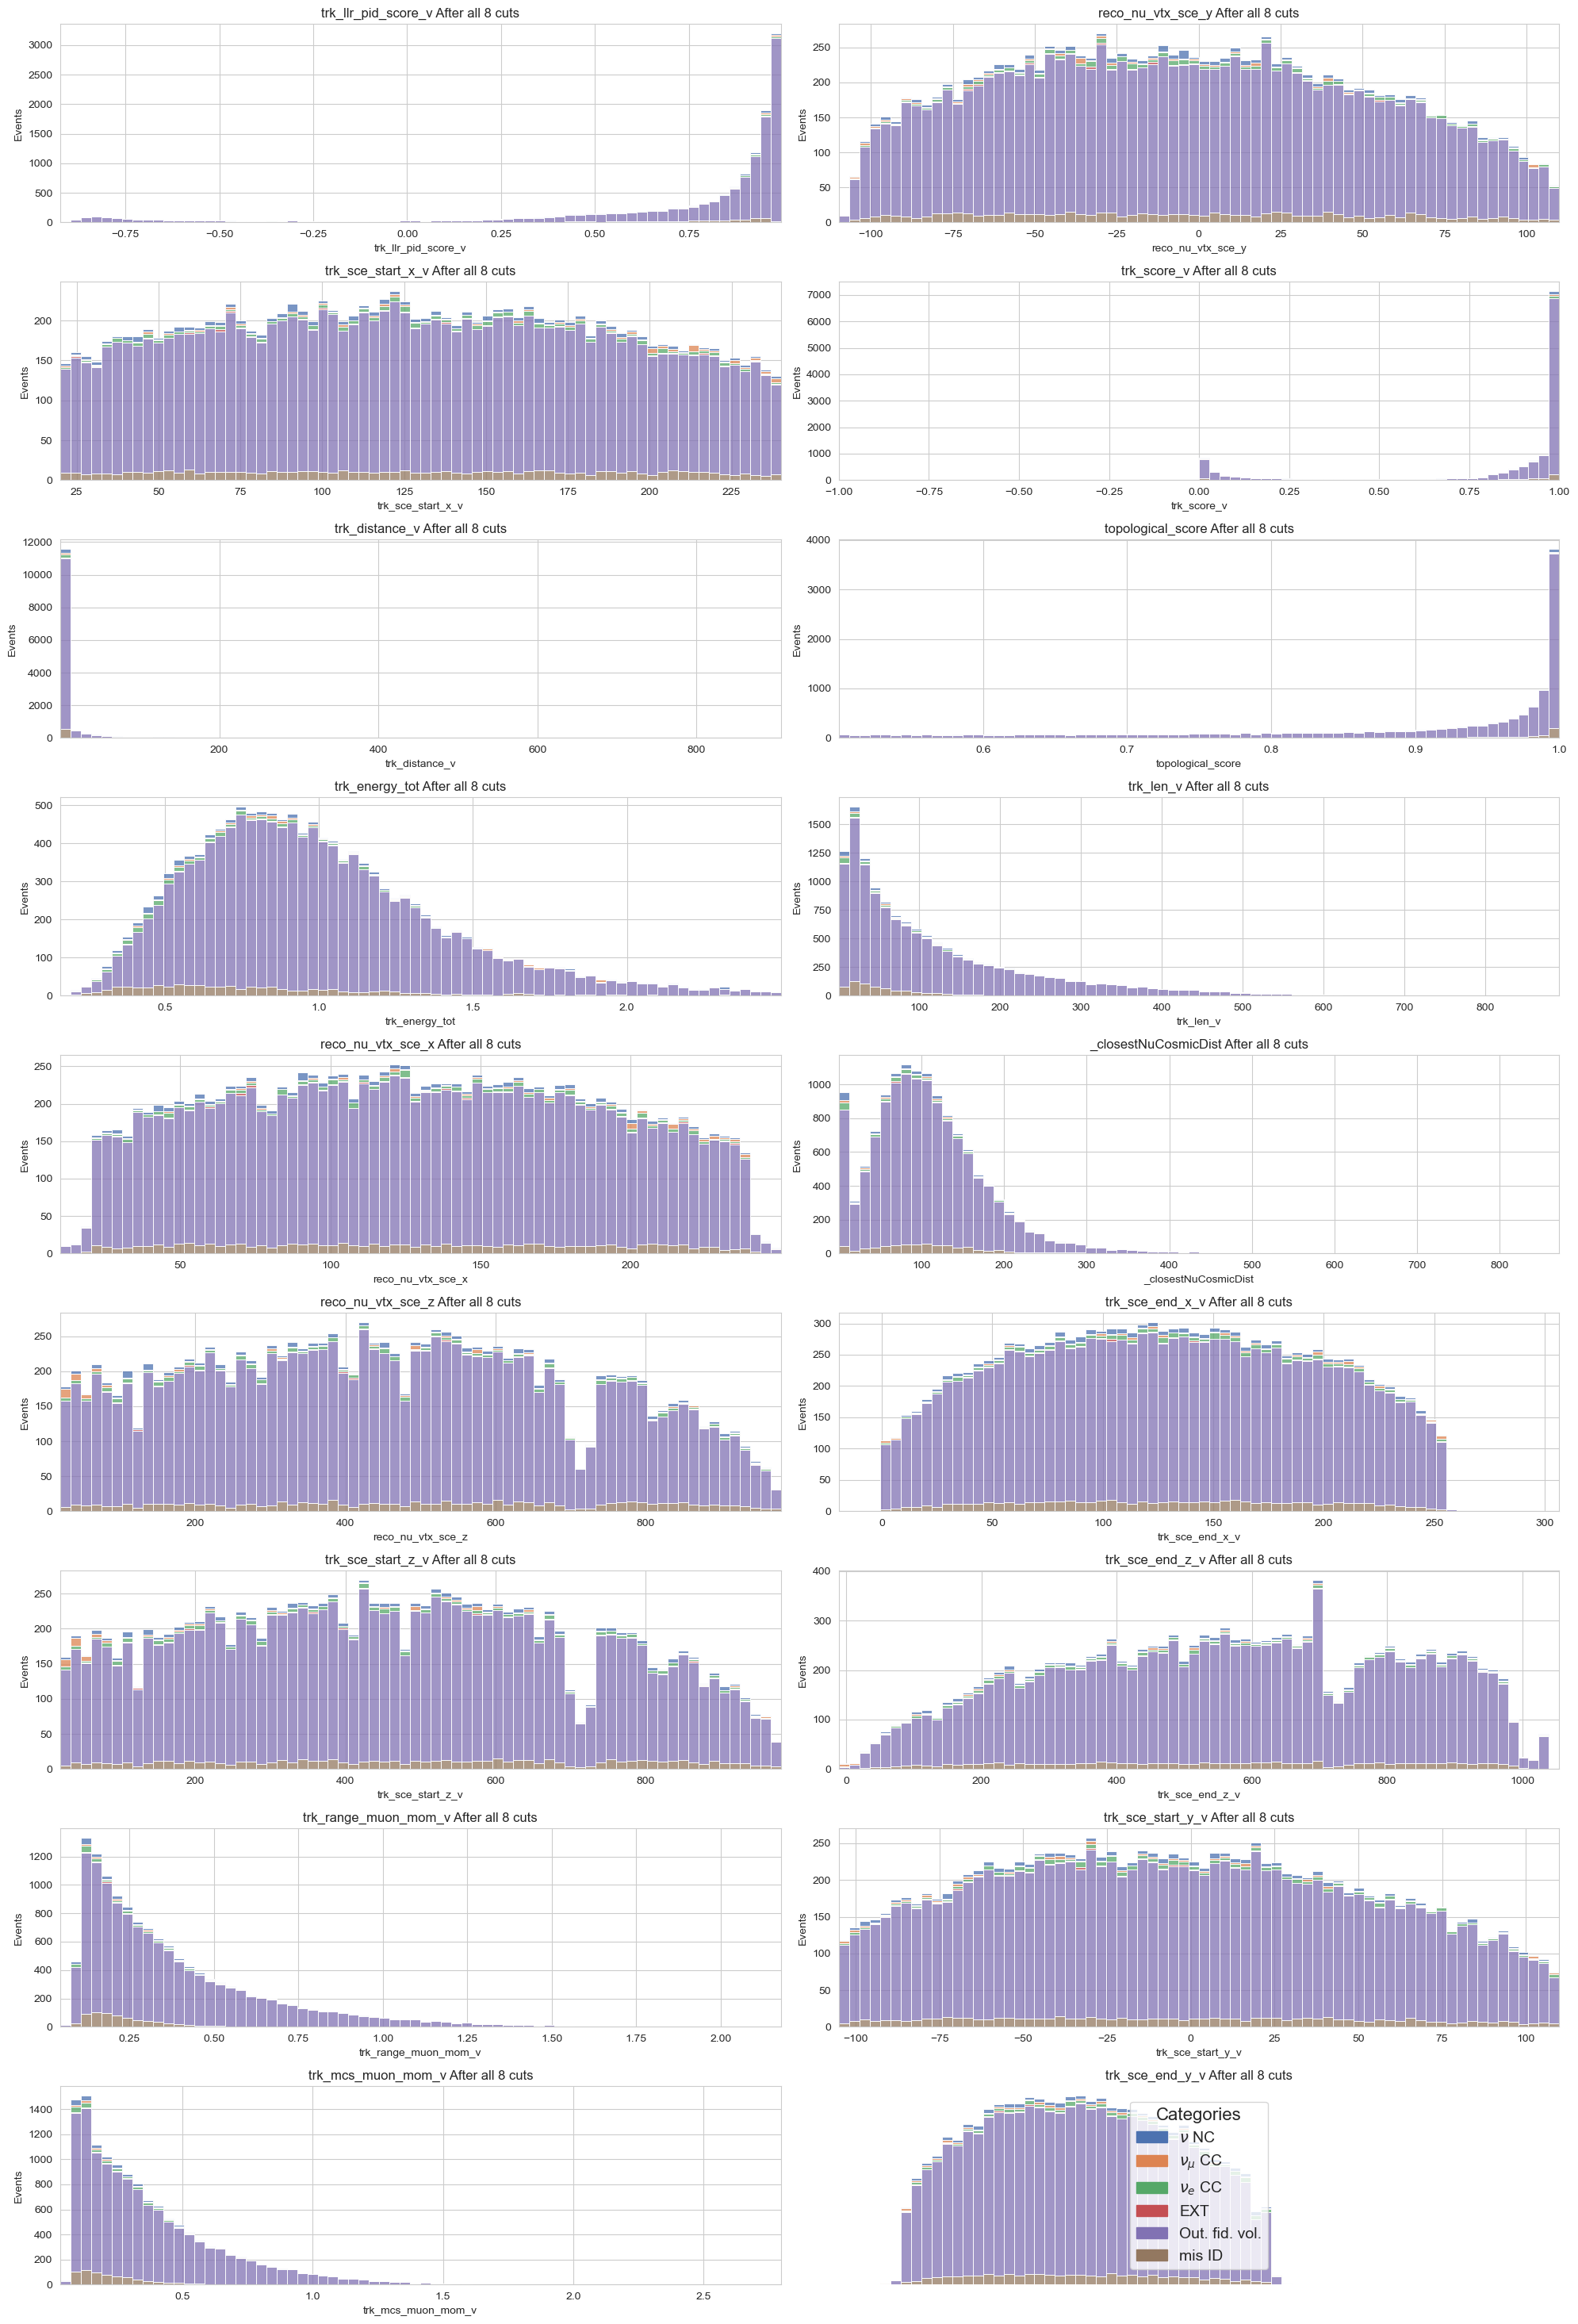

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_all_histograms(df, variables, title_cut, BIN=23, figsize=(20, 30)):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    n_vars = len(variables)
    n_cols = 2
    n_rows = (n_vars + n_cols - 1) // n_cols

    plt.figure(figsize=figsize)
    for idx, var in enumerate(variables):
        ax = plt.subplot(n_rows, n_cols, idx + 1)

        # ✅ 权重应从当前 df 取，而不是全局 MC_EXT
        w = df['weight'] if 'weight' in df.columns else None

        if 'category' in df.columns:
            sns.histplot(
                data=df, x=var,
                multiple="stack", hue="category",
                palette="deep", weights=w,
                bins=BIN, legend=False, ax=ax
            )
        else:
            sns.histplot(x=df[var], bins=BIN, weights=w, ax=ax)

        ax.set_xlabel(var)
        ax.set_ylabel("Events")
        ax.set_title(f"{var} {title_cut}")
        plt.xlim([np.min(df[var]), np.max(df[var])])

    # ✅ 单独绘制图例（保持一致）
    legend_ax = plt.subplot(n_rows, n_cols, n_rows * n_cols)
    legend_ax.axis('off')
    labels = [r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC",
              r"EXT", r"Out. fid. vol.", r"mis ID"]
    patches = [plt.Rectangle((0,0),1,1, color=c)
               for c in sns.color_palette("deep", n_colors=len(labels))]
    legend_ax.legend(patches, labels, title='Categories',
                     loc='center', fontsize=14, title_fontsize=16)

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()



plot_all_histograms(MC_after, vars_to_try, title_cut="After all 8 cuts",
                    BIN=70, figsize=(20, 30))

Things that haven't being cut:
trk_llr_pid_score_v

trk_score_v

trk_distance_v

trk_len_v

_closestNuCosmicDist

trk_sce_end_x_v

trk_sce_end_y_v

trk_sce_end_z_v

trk_range_muon_mom_v

trk_mcs_muon_mom_v

For trk_llr_pid_score_v, cut doesn't significantly increase the purity, so leave it uncut


In [119]:
import numpy as np
import pandas as pd

def _ensure_df(df):
    # 如果误传了 (df, eff, pur) 这种元组，这里自动取第一个
    if isinstance(df, tuple) or isinstance(df, list):
        if len(df) > 0 and hasattr(df[0], 'columns'):
            df = df[0]
        else:
            raise TypeError("Expected a DataFrame or (DataFrame, ...). Got:", type(df))
    if not hasattr(df, 'columns'):
        raise TypeError(f"Expected DataFrame, got {type(df)}")
    return df

def _series_to_float_array(series):
    # 兼容对象列/列表列：优先直接转数值，否则取第一个元素再转
    if pd.api.types.is_numeric_dtype(series):
        return series.to_numpy(dtype=float)
    def first_num(v):
        if isinstance(v, (list, tuple, np.ndarray)):
            if len(v) == 0:
                return np.nan
            v = v[0]
        try:
            return float(v)
        except Exception:
            return np.nan
    return np.array([first_num(v) for v in series], dtype=float)

def pick_best_threshold_and_plot(MC_df, DATA_df, var, direction='>', nsteps=201, signal_label=21):
    """
    在 MC 上扫描阈值，找到使 S/sqrt(S+B) 最大的 t_best，
    然后调用你已有的 plot_single_cut() 画图（单边 cut）。
    """
    MC_df = _ensure_df(MC_df)
    DATA_df = _ensure_df(DATA_df)

    if var not in MC_df.columns:
        raise KeyError(f"{var} not in MC MC_df.columns")

    # 取数据与权重
    x = _series_to_float_array(MC_df[var])
    w = MC_df['weight'].to_numpy(dtype=float) if 'weight' in MC_df.columns else np.ones(len(MC_df))
    is_sig = (MC_df['category'] == signal_label).to_numpy() if 'category' in MC_df.columns else np.zeros(len(MC_df), dtype=bool)

    # 扫描范围基于真实数据范围
    x = np.asarray(x, dtype=float)
    good = np.isfinite(x)
    x = x[good]; w = w[good]; is_sig = is_sig[good]

    x_min, x_max = np.nanmin(x), np.nanmax(x)
    if not np.isfinite(x_min) or not np.isfinite(x_max) or x_min == x_max:
        raise ValueError(f"{var}: invalid numeric range for threshold scan.")
    ts = np.linspace(x_min, x_max, nsteps)

    def metrics_at_t(t):
        keep = (x > t) if direction == '>' else (x < t)
        Wk = w[keep]; yk = is_sig[keep]
        S = Wk[yk].sum(); B = Wk[~yk].sum()
        S_tot = w[is_sig].sum()
        eff = S / S_tot if S_tot > 0 else 0.0
        kept = S + B
        pur = S / kept if kept > 0 else np.nan
        sig = S / np.sqrt(S + B) if (S + B) > 0 else 0.0
        return eff, pur, sig

    effs, purs, sigs = zip(*[metrics_at_t(t) for t in ts])
    effs, purs, sigs = np.array(effs), np.array(purs), np.array(sigs)
    idx_best = int(np.nanargmax(sigs))
    t_best = float(ts[idx_best])

    print(f"\n[{var}] Best threshold by S/sqrt(S+B): keep if {var} {'>' if direction=='>' else '<'} {t_best:.4f}")
    print(f"    (MC) efficiency={effs[idx_best]:.4f}  purity={purs[idx_best]:.4f}  S/sqrt(S+B)={sigs[idx_best]:.4f}")

    # 用你现有的绘图函数画“单边 cut”的图
    if direction == '>':
        plot_single_cut(MC_df, DATA_df, var, lo=t_best, hi=None, bins=40)
    else:
        plot_single_cut(MC_df, DATA_df, var, lo=None, hi=t_best, bins=40)

    return t_best, effs[idx_best], purs[idx_best], sigs[idx_best]



[trk_llr_pid_score_v] Best threshold by S/sqrt(S+B): keep if trk_llr_pid_score_v > -0.9287
    (MC) efficiency=1.0000  purity=0.3850  S/sqrt(S+B)=127.6905
[MC]   trk_llr_pid_score_v in [-0.9286669927835465, +inf]  efficiency=1.0000  purity=0.4215  kept=555433/555442
[DATA] trk_llr_pid_score_v in [-0.9286669927835465, +inf]  efficiency=0.0000  purity=N/A      kept=119905/119911


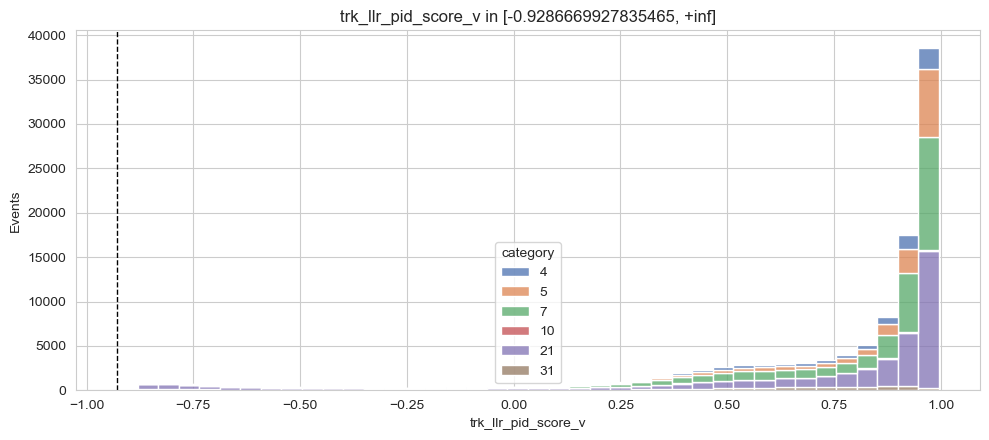


[trk_score_v] Best threshold by S/sqrt(S+B): keep if trk_score_v > -1.0000
    (MC) efficiency=0.9999  purity=0.3850  S/sqrt(S+B)=127.6822
[MC]   trk_score_v in [-1.0, +inf]  efficiency=1.0000  purity=0.4215  kept=555442/555442
[DATA] trk_score_v in [-1.0, +inf]  efficiency=0.0000  purity=N/A      kept=119911/119911


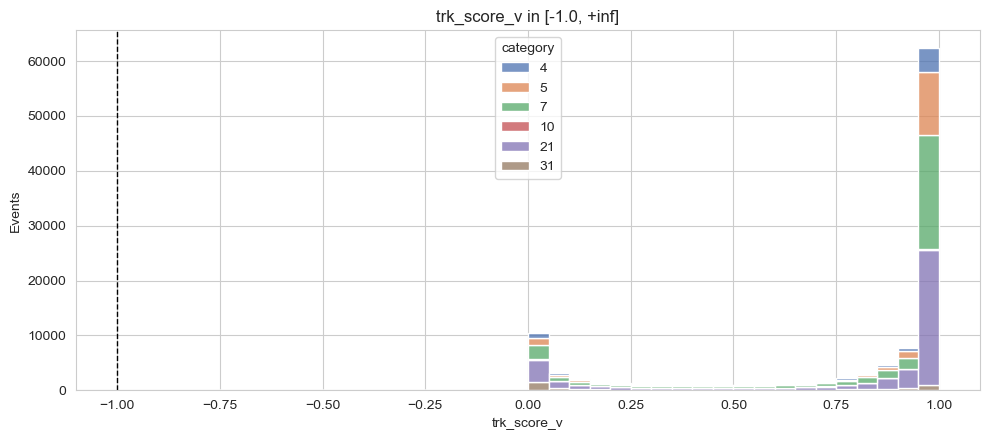

In [120]:
# 1) LLR PID（越大越“μ-like” → 单边 '>'）
t_pid, eff_pid, pur_pid, sig_pid = pick_best_threshold_and_plot(
    MC_EXT, data_frame, var='trk_llr_pid_score_v', direction='>'
)

# 2) trk_score_v（同理）
t_trk, eff_trk, pur_trk, sig_trk = pick_best_threshold_and_plot(
    MC_EXT, data_frame, var='trk_score_v', direction='>'
)


In [121]:
import numpy as np
import pandas as pd

def _SB_metrics_with_eff(W_sig, W_bkg, S_tot, TOT_tot):
    S = float(W_sig.sum()); B = float(W_bkg.sum())
    kept = S + B
    purity = S/kept if kept>0 else np.nan
    # 新主指标：整体效率（overall_eff）
    overall_eff = kept / TOT_tot if TOT_tot>0 else 0.0
    # 备用参考：信号效率（signal_eff）
    signal_eff = S / S_tot if S_tot>0 else 0.0
    s_over_sqrt_sb = S/np.sqrt(kept) if kept>0 else 0.0
    return dict(S=S, B=B, kept=kept, purity=purity,
                overall_eff=overall_eff, signal_eff=signal_eff,
                s_over_sqrt_sb=s_over_sqrt_sb)


In [122]:
def scan_best_single_max_purity(x, w, is_sig, direction='auto', nsteps=201,
                                min_kept_frac=0.0):
    """
    最大化 purity；若 purity 相同，用 S/√(S+B) 做 tie-break，再用 S 做第二 tie-break。
    min_kept_frac：要求 kept/TOT_tot 至少达到该比例（防止极端“只留极少量事件”导致 purity=1.0 的伪优解）。
    """
    x = np.asarray(x, float); w = np.asarray(w, float); is_sig = np.asarray(is_sig, bool)
    good = np.isfinite(x); x, w, is_sig = x[good], w[good], is_sig[good]
    if x.size == 0 or np.nanmin(x)==np.nanmax(x):
        return None
    xmin, xmax = np.nanmin(x), np.nanmax(x)
    ts = np.linspace(xmin, xmax, nsteps)
    S_tot = w[is_sig].sum()
    TOT_tot = w.sum()

    def eval_dir(dir_flag):
        best = {"t": None, "dir": dir_flag, "purity": -1, "s_over_sqrt_sb": -1, "S": -1,
                "overall_eff": 0.0, "signal_eff": 0.0}
        for t in ts:
            keep = (x > t) if dir_flag == '>' else (x < t)
            Wk = w[keep]; yk = is_sig[keep]
            mets = _SB_metrics_with_eff(Wk[yk], Wk[~yk], S_tot, TOT_tot)
            # 约束：整体效率（kept/TOT）必须 >= min_kept_frac
            if mets["overall_eff"] < min_sig_frac: 
                continue
            key = (mets["purity"], mets["s_over_sqrt_sb"], mets["S"])
            best_key = (best["purity"], best["s_over_sqrt_sb"], best["S"])
            if key > best_key:
                best.update(dict(t=float(t), purity=mets["purity"],
                                 s_over_sqrt_sb=mets["s_over_sqrt_sb"], S=mets["S"],
                                 overall_eff=mets["overall_eff"], signal_eff=mets["signal_eff"]))
        return best if best["t"] is not None else None

    if direction in ('>', '<'):
        return eval_dir(direction)
    else:
        a = eval_dir('>'); b = eval_dir('<')
        if a is None: return b
        if b is None: return a
        key_a = (a["purity"], a["s_over_sqrt_sb"], a["S"])
        key_b = (b["purity"], b["s_over_sqrt_sb"], b["S"])
        return a if key_a >= key_b else b


In [123]:
def scan_best_window_max_purity(x, w, is_sig, nqs=51, min_kept_frac=0.0):
    x = np.asarray(x, float); w = np.asarray(w, float); is_sig = np.asarray(is_sig, bool)
    good = np.isfinite(x); x, w, is_sig = x[good], w[good], is_sig[good]
    if x.size == 0 or np.nanmin(x)==np.nanmax(x):
        return None

    qs = np.linspace(0.0, 1.0, nqs)
    grid = np.quantile(x, qs)

    order = np.argsort(x)
    xs = x[order]; ws = w[order]; ys = is_sig[order]
    Wsig = ws * ys
    Wbkg = ws * (~ys)
    cS = np.concatenate([[0.0], np.cumsum(Wsig)])
    cB = np.concatenate([[0.0], np.cumsum(Wbkg)])
    S_tot = Wsig.sum()
    TOT_tot = ws.sum()

    best = {"lo": None, "hi": None, "purity": -1, "s_over_sqrt_sb": -1, "S": -1,
            "overall_eff": 0.0, "signal_eff": 0.0}
    for i, lo in enumerate(grid[:-1]):
        L = np.searchsorted(xs, lo, side='left')
        for hi in grid[i+1:]:
            R = np.searchsorted(xs, hi, side='right')
            S = cS[R] - cS[L]
            B = cB[R] - cB[L]
            kept = S + B
            if kept <= 0: 
                continue
            overall_eff = kept / TOT_tot if TOT_tot>0 else 0.0
            if overall_eff < min_sig_frac:
                continue
            purity = S/kept
            signal_eff = S / S_tot if S_tot>0 else 0.0
            s_over_sqrt_sb = S/np.sqrt(kept)
            key = (purity, s_over_sqrt_sb, S)
            best_key = (best["purity"], best["s_over_sqrt_sb"], best["S"])
            if key > best_key:
                best.update(dict(lo=float(lo), hi=float(hi), purity=purity,
                                 s_over_sqrt_sb=s_over_sqrt_sb, S=float(S),
                                 overall_eff=overall_eff, signal_eff=signal_eff))
    return best if best["lo"] is not None else None


In [124]:
def auto_pick_cut_max_purity(MC_df, var, nsteps_single=201, nqs_window=51,
                             signal_label=21, min_kept_frac=0.0, single_bias=1.00):
    MC_df = _ensure_df(MC_df)
    if var not in MC_df.columns:
        raise KeyError(f"{var} not in MC columns")
    x = _series_to_float_array(MC_df[var])
    w = MC_df['weight'].to_numpy(dtype=float) if 'weight' in MC_df.columns else np.ones(len(MC_df))
    is_sig = (MC_df['category'] == signal_label).to_numpy() if 'category' in MC_df.columns else np.zeros(len(MC_df), bool)

    best_s = scan_best_single_max_purity(x, w, is_sig, direction='auto', nsteps=nsteps_single, min_sig_frac=min_sig_frac)
    best_w = scan_best_window_max_purity(x, w, is_sig, nqs=nqs_window, min_sig_frac=min_sig_frac)

    cand = []
    if best_s is not None:
        cand.append(("single", best_s["purity"]*single_bias, best_s))
    if best_w is not None:
        cand.append(("window", best_w["purity"], best_w))
    if not cand:
        return {"mode":"none", "detail":None}

    mode, _, detail = max(cand, key=lambda t: t[1])
    return {"mode": mode, "detail": detail}

def auto_optimize_and_plot_max_purity(MC_df, DATA_df, var, nsteps_single=201, nqs_window=51,
                                      signal_label=21, bins=40, min_kept_frac=0.0, single_bias=1.00):
    MC_df = _ensure_df(MC_df); DATA_df = _ensure_df(DATA_df)
    pick = auto_pick_cut_max_purity(MC_df, var, nsteps_single, nqs_window, signal_label, min_kept_frac, single_bias)
    mode, d = pick["mode"], pick["detail"]

    if mode == "none":
        print(f"\n[{var}] 无可行 cut（可能数据为空/常数或满足 min_kept_frac 的窗口不存在）")
        return {"var":var, "mode":"none"}

    if mode == "single":
        arrow, t = d["dir"], d["t"]
        print(f"\n[{var}] AUTO→SINGLE  keep if {var} {arrow} {t:.6g}")
        print(f"    purity={d['purity']:.4f}  overall_eff={d['overall_eff']:.4f}  signal_eff={d['signal_eff']:.4f}")
        if arrow == '>':
            plot_single_cut(MC_df, DATA_df, var, lo=t, hi=None, bins=bins)
            lo, hi = t, None
        else:
            plot_single_cut(MC_df, DATA_df, var, lo=None, hi=t, bins=bins)
            lo, hi = None, t

    else: # window
        lo, hi = d["lo"], d["hi"]
        print(f"\n[{var}] AUTO→WINDOW  {lo:.6g} < {var} < {hi:.6g}")
        print(f"    purity={d['purity']:.4f}  overall_eff={d['overall_eff']:.4f}  signal_eff={d['signal_eff']:.4f}")
        plot_single_cut(MC_df, DATA_df, var, lo=lo, hi=hi, bins=bins)

    return {"var":var, "mode":mode, "lo":lo, "hi":hi,
            "purity":d["purity"], "overall_eff":d["overall_eff"], "signal_eff":d["signal_eff"]}


In [125]:
def auto_pick_cut_max_purity(MC_df, var, nsteps_single=201, nqs_window=51,
                             signal_label=21, min_kept_frac=0.0, single_bias=1.00):
    MC_df = _ensure_df(MC_df)
    if var not in MC_df.columns:
        raise KeyError(f"{var} not in MC columns")
    x = _series_to_float_array(MC_df[var])
    w = MC_df['weight'].to_numpy(dtype=float) if 'weight' in MC_df.columns else np.ones(len(MC_df))
    is_sig = (MC_df['category'] == signal_label).to_numpy() if 'category' in MC_df.columns else np.zeros(len(MC_df), bool)

    best_s = scan_best_single_max_purity(x, w, is_sig, direction='auto', nsteps=nsteps_single, min_sig_frac=min_sig_frac)
    best_w = scan_best_window_max_purity(x, w, is_sig, nqs=nqs_window, min_sig_frac=min_sig_frac)

    cand = []
    if best_s is not None:
        cand.append(("single", best_s["purity"]*single_bias, best_s))
    if best_w is not None:
        cand.append(("window", best_w["purity"], best_w))
    if not cand:
        return {"mode":"none", "detail":None}

    mode, _, detail = max(cand, key=lambda t: t[1])
    return {"mode": mode, "detail": detail}

def auto_optimize_and_plot_max_purity(MC_df, DATA_df, var, nsteps_single=201, nqs_window=51,
                                      signal_label=21, bins=40, min_kept_frac=0.0, single_bias=1.00):
    MC_df = _ensure_df(MC_df); DATA_df = _ensure_df(DATA_df)
    pick = auto_pick_cut_max_purity(MC_df, var, nsteps_single, nqs_window, signal_label, min_kept_frac, single_bias)
    mode, d = pick["mode"], pick["detail"]

    if mode == "none":
        print(f"\n[{var}] 无可行 cut（可能数据为空/常数或满足 min_kept_frac 的窗口不存在）")
        return {"var":var, "mode":"none"}

    if mode == "single":
        arrow, t = d["dir"], d["t"]
        print(f"\n[{var}] AUTO→SINGLE  keep if {var} {arrow} {t:.6g}")
        print(f"    purity={d['purity']:.4f}  overall_eff={d['overall_eff']:.4f}  signal_eff={d['signal_eff']:.4f}")
        if arrow == '>':
            plot_single_cut(MC_df, DATA_df, var, lo=t, hi=None, bins=bins)
            lo, hi = t, None
        else:
            plot_single_cut(MC_df, DATA_df, var, lo=None, hi=t, bins=bins)
            lo, hi = None, t

    else: # window
        lo, hi = d["lo"], d["hi"]
        print(f"\n[{var}] AUTO→WINDOW  {lo:.6g} < {var} < {hi:.6g}")
        print(f"    purity={d['purity']:.4f}  overall_eff={d['overall_eff']:.4f}  signal_eff={d['signal_eff']:.4f}")
        plot_single_cut(MC_df, DATA_df, var, lo=lo, hi=hi, bins=bins)

    return {"var":var, "mode":mode, "lo":lo, "hi":hi,
            "purity":d["purity"], "overall_eff":d["overall_eff"], "signal_eff":d["signal_eff"]}


In [126]:
def compare_single_window_summary_max_purity(MC_df, vars_to_try, nsteps_single=201, nqs_window=51,
                                             signal_label=21, min_kept_frac=0.0, single_bias=1.00):
    MC_df = _ensure_df(MC_df)
    rows = []
    for var in vars_to_try:
        if var not in MC_df.columns:
            rows.append({"var":var, "note":"NOT IN COLUMNS"}); continue
        x = _series_to_float_array(MC_df[var])
        w = MC_df['weight'].to_numpy(dtype=float) if 'weight' in MC_df.columns else np.ones(len(MC_df))
        is_sig = (MC_df['category'] == signal_label).to_numpy() if 'category' in MC_df.columns else np.zeros(len(MC_df), bool)

        S_tot = w[is_sig].sum(); TOT_tot = w.sum()
        best_s = scan_best_single_max_purity(x, w, is_sig, direction='auto', nsteps=nsteps_single, min_sig_frac=min_sig_frac)
        best_w = scan_best_window_max_purity(x, w, is_sig, nqs=nqs_window, min_sig_frac=min_sig_frac)

        # 选择
        cand = []
        if best_s is not None: cand.append(("single", best_s["purity"]*single_bias))
        if best_w is not None: cand.append(("window", best_w["purity"]))
        chosen = max(cand, key=lambda t: t[1])[0] if cand else "none"

        rows.append({
            "var": var,
            # 单边
            "single_dir": (best_s["dir"] if best_s else None),
            "single_t":   (best_s["t"]   if best_s else None),
            "single_purity": (best_s["purity"] if best_s else np.nan),
            "single_overall_eff": (best_s["overall_eff"] if best_s else np.nan),
            "single_signal_eff":  (best_s["signal_eff"]  if best_s else np.nan),
            # 双边
            "win_lo":     (best_w["lo"]  if best_w else None),
            "win_hi":     (best_w["hi"]  if best_w else None),
            "win_purity": (best_w["purity"] if best_w else np.nan),
            "win_overall_eff": (best_w["overall_eff"] if best_w else np.nan),
            "win_signal_eff":  (best_w["signal_eff"]  if best_w else np.nan),
            # 选择
            "chosen_mode": chosen
        })
    return pd.DataFrame(rows)

def run_all_auto_max_purity(MC_df, DATA_df, vars_to_try, nsteps_single=201, nqs_window=51,
                            signal_label=21, bins=40, min_kept_frac=0.0, single_bias=1.00, cumulative=False):
    MC_df = _ensure_df(MC_df); DATA_df = _ensure_df(DATA_df)
    results = []
    mc_cur, dt_cur = MC_df, DATA_df
    for var in vars_to_try:
        res = auto_optimize_and_plot_max_purity(mc_cur, dt_cur, var, nsteps_single, nqs_window,
                                                signal_label, bins, min_sig_frac, single_bias)
        results.append(res)
        if cumulative and res["mode"]!="none":
            if res["mode"]=="single":
                if res["lo"] is not None:
                    mc_cur = mc_cur[mc_cur[var] > res["lo"]]
                    dt_cur = dt_cur[dt_cur[var] > res["lo"]]
                else:
                    mc_cur = mc_cur[mc_cur[var] < res["hi"]]
                    dt_cur = dt_cur[dt_cur[var] < res["hi"]]
            else:
                mc_cur = mc_cur[(mc_cur[var] > res["lo"]) & (mc_cur[var] < res["hi"])]
                dt_cur = dt_cur[(dt_cur[var] > res["lo"]) & (dt_cur[var] < res["hi"])]
    return pd.DataFrame(results)


In [127]:
vars_to_try = [
    'trk_llr_pid_score_v','reco_nu_vtx_sce_y','trk_sce_start_x_v',
    'trk_score_v','trk_distance_v','topological_score','trk_energy_tot',
    'trk_len_v','reco_nu_vtx_sce_x','_closestNuCosmicDist','reco_nu_vtx_sce_z',
    'trk_sce_end_x_v','trk_sce_start_z_v','trk_sce_end_z_v',
    'trk_range_muon_mom_v','trk_sce_start_y_v','trk_mcs_muon_mom_v','trk_sce_end_y_v'
]

# 约束：信号效率（Eq.6）至少 20%
MIN_SIG_EFF = 0.20
SINGLE_BIAS = 1.00  # 保持不偏向单边

summary_compare = compare_single_window_summary_max_purity(
    MC_EXT, vars_to_try,
    nsteps_single=201, nqs_window=51,
    signal_label=21,
    min_sig_eff=MIN_SIG_EFF,      # ← 用信号效率下限
    single_bias=SINGLE_BIAS
)
try:
    display(summary_compare)
except:
    print(summary_compare.to_string(index=False))

summary_picked = run_all_auto_max_purity(
    MC_EXT, data_frame, vars_to_try,
    nsteps_single=201, nqs_window=51,
    signal_label=21, bins=40,
    min_sig_eff=MIN_SIG_EFF,      # ← 用信号效率下限
    single_bias=SINGLE_BIAS,
    cumulative=False
)
print("\n=== Picked cuts (max purity) — individual ===")
try:
    display(summary_picked)
except:
    print(summary_picked.to_string(index=False))


TypeError: compare_single_window_summary_max_purity() got an unexpected keyword argument 'min_sig_eff'

# Exercise 9: Plot the energy spectrums here and normalise

Final representation of MC and data after applying the cuts.

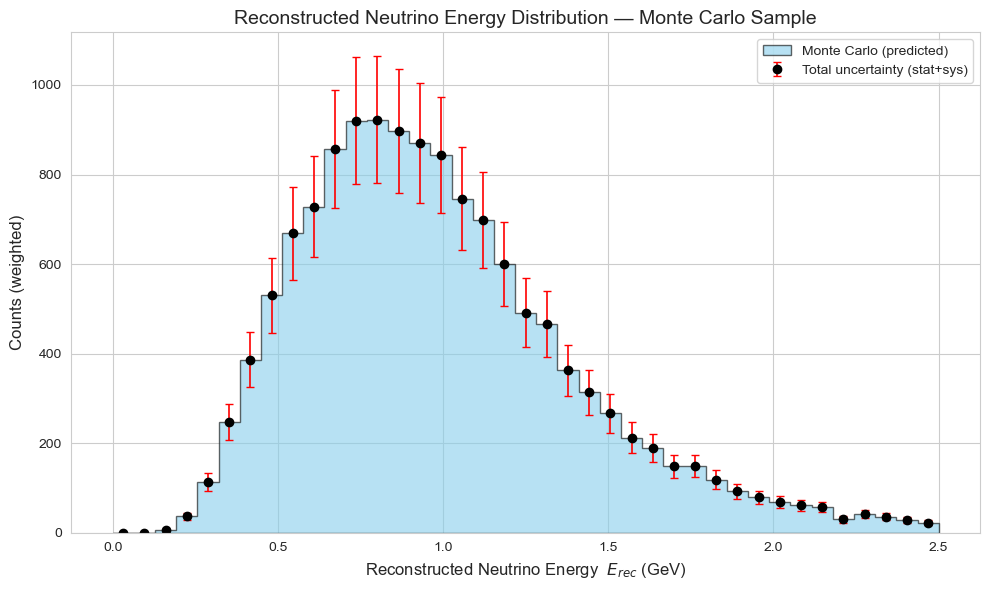

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 假设你的 Monte Carlo 数据在名为 frame_MC 的 DataFrame 中
# 并且其中的能量列名为 'trk_energy_tot'，权重列名为 'weight'

energy = MC_after['trk_energy_tot']
weights = MC_after['weight']

# 画直方图（带权重）
plt.figure(figsize=(10,6))
bins = np.linspace(0, 2.5, 40)  # 可根据能量范围调整

plt.hist(energy, bins=bins, weights=weights, histtype='stepfilled',
         alpha=0.6, color='skyblue', edgecolor='black', label='Monte Carlo (predicted)')

# 计算系统误差（15%）和统计误差（√N）
counts, bin_edges = np.histogram(energy, bins=bins, weights=weights)
stat_unc = np.sqrt(counts)
sys_unc = 0.15 * counts
total_unc = np.sqrt(stat_unc**2 + sys_unc**2)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# 在柱状图上加误差条
plt.errorbar(bin_centers, counts, yerr=total_unc, fmt='o', color='black',
             ecolor='red', elinewidth=1.2, capsize=3, label='Total uncertainty (stat+sys)')

plt.xlabel("Reconstructed Neutrino Energy  $E_{rec}$ (GeV)", fontsize=12)
plt.ylabel("Counts (weighted)", fontsize=12)
plt.title("Reconstructed Neutrino Energy Distribution — Monte Carlo Sample", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


# Exercise 10: Oscillation and fitting

### a) Define functions requires for Oscillation analysis, test that they work!


In [ ]:
# oscillation function


In [ ]:
# muon disappearance application to reconstructed neutrino energy


In [ ]:
# chi squared function


# Exercise 11/12: Oscillation parameter scan, contour plotting, closure test.

### Closure test, create your oscillation parameter scanning code, and find minimum values for chi squared!

In [ ]:
# Selection cuts on oscillated data

In [ ]:
# Function that oscillates and calculates chi squared for set delM21 and sin^2(2theta)

In [ ]:
# Function that loops the above function across range of values of delM21 and sin^2(2theta)

In [ ]:
# plot contourf function and find minimum!

Apply your above defined functions, and represent your result with matplotlib's contour and fcontour.

In [ ]:
# oscillate MC wrt to true data

In [ ]:
# contourf application

### Bonus: Minimise

Minimise your chi square value, determining the parameters of 'best fit'

### Confidence levels and parameter minima. 
Determine confidence levels, and find the parameter values that correspond to the lowest chi squared value within your range.with

In [ ]:
# contour application, with correct confidence levels.

In [ ]:
# find lowest chi squared value within range and plot with CL, or contourf plot.

# Exercise 13/14: 3+1 Framework Neutrino disappearance.

In [ ]:
# Produce your new oscillation parameter, which should be sin^2(2*theta_ue)

# Compare your result with MiniBooNE

Results are extracted from MiniBooNE (orange) and LSND (blue)

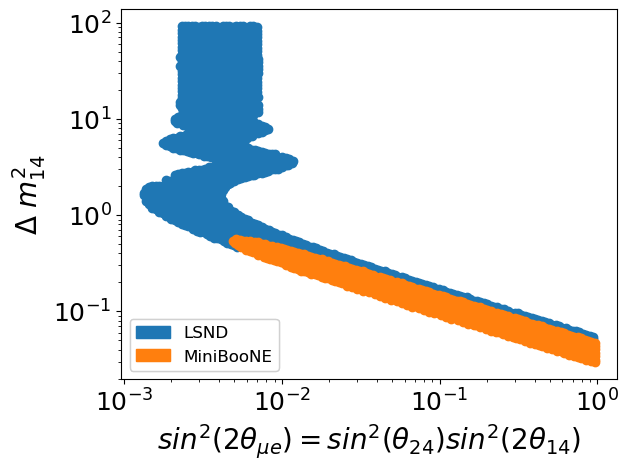

In [ ]:
# Load data
LSND_data = pd.read_csv('./data/DataSet_LSND.csv').to_numpy()
MiniBooNE_data = pd.read_csv('./data/DataSet_MiniBooNE.csv').to_numpy()

# Plot data
plt.plot(LSND_data[:,0],LSND_data[:,1],'o')
plt.plot(MiniBooNE_data[:,0],MiniBooNE_data[:,1],'o')

# Producing MiniBooNE/LSND legend
LSND_path = mpatches.Patch(color='tab:blue', label = 'LSND')
MINI_path = mpatches.Patch(color='tab:orange', label = 'MiniBooNE')
first_legend = plt.legend(handles=[LSND_path, MINI_path], loc = 'lower left', fontsize = 12)
plt.gca().add_artist(first_legend)


plt.xlabel(r'$sin^2(2\theta_{\mu e})=sin^2(\theta_{24})sin^2(2\theta_{14})$',fontsize=20)
plt.ylabel(r'$\Delta$ $m_{14}^2$',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.show()